# Task 1: Ascending the Gradient Descent

### Dataset:

In [1]:
# !pip install torch
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Set the random seed for reproducibility
torch.manual_seed(45)  # You can change 42 to any other number

In [3]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1_dataset = np.random.uniform(-1, 1, num_samples)
f_x_dataset = 3*x1_dataset + 4
eps_dataset = np.random.randn(num_samples)
y_dataset = f_x_dataset + eps_dataset # y = 3*x+4+noise

In [4]:
print(x1_dataset)

[ 0.97802303  0.09908945 -0.4371054  -0.84542087 -0.11106101 -0.05438406
 -0.902956   -0.6733511  -0.76809858  0.25478337  0.7123641   0.30020484
  0.98144337 -0.0592985   0.23658897 -0.43466559  0.95200663  0.346136
 -0.11893822 -0.42062532  0.01939937 -0.77507821 -0.54609042 -0.04289539
 -0.51448369 -0.22403496  0.63774686 -0.85091843  0.84629908 -0.55020784
  0.41274297 -0.77886909  0.20200825 -0.18641492  0.6736589  -0.49993914
 -0.08452402  0.11486541 -0.4960996  -0.77951736]


In [5]:
print(f_x_dataset) # 3*x1+4

[6.93406908 4.29726836 2.68868381 1.4637374  3.66681698 3.83684782
 1.29113201 1.97994669 1.69570427 4.7643501  6.13709229 4.90061453
 6.94433011 3.82210449 4.7097669  2.69600324 6.85601989 5.03840799
 3.64318533 2.73812404 4.0581981  1.67476537 2.36172874 3.87131383
 2.45654894 3.32789511 5.91324057 1.44724471 6.53889723 2.34937649
 5.23822891 1.66339274 4.60602474 3.44075523 6.0209767  2.50018257
 3.74642795 4.34459622 2.5117012  1.66144793]


In [6]:
print(eps_dataset) # randomly generaate errors from normal distribution

[-0.93102638  1.11098606 -0.18968296  1.27840959 -0.55407712  0.35430274
 -0.44027617 -0.42444883  0.22808162  0.57904417 -0.85418835 -0.84134033
 -0.65570411 -0.1468827  -1.4119755  -0.27055682  1.1293033  -1.34025807
 -0.24929603  1.76349221 -0.59195943 -0.90781168  0.27179962 -0.00456167
  0.85410694 -1.59000488  0.05604899  0.10586257 -0.09083758 -0.71387606
  0.20371539  1.20303184  0.08431307  0.16393392  0.37375155 -0.22690685
 -0.6712744   0.31410988  1.48441811  0.65216416]


In [7]:
print(y_dataset) # y_values with errors

[6.0030427  5.40825442 2.49900085 2.74214699 3.11273986 4.19115056
 0.85085583 1.55549786 1.92378589 5.34339426 5.28290394 4.05927419
 6.288626   3.67522179 3.2977914  2.42544641 7.9853232  3.69814992
 3.3938893  4.50161625 3.46623868 0.76695369 2.63352835 3.86675216
 3.31065588 1.73789022 5.96928955 1.55310728 6.44805966 1.63550044
 5.4419443  2.86642458 4.69033781 3.60468915 6.39472825 2.27327572
 3.07515354 4.6587061  3.99611931 2.31361209]


In [8]:
# check:
i=1 # vary i to check thaat the dataset is calculated  correctly
print(f_x_dataset[i] == 3*x1_dataset[i]+4, y_dataset[i] == f_x_dataset[i]+eps_dataset[i])

True True


In [9]:
# Make numpy arrays into torch tensors
x_dataset = torch.tensor(x1_dataset, dtype=torch.float32).view(-1, 1)
y_dataset = torch.tensor(y_dataset, dtype=torch.float32).view(-1, 1)
print(x_dataset)
print(y_dataset)

tensor([[ 0.9780],
        [ 0.0991],
        [-0.4371],
        [-0.8454],
        [-0.1111],
        [-0.0544],
        [-0.9030],
        [-0.6734],
        [-0.7681],
        [ 0.2548],
        [ 0.7124],
        [ 0.3002],
        [ 0.9814],
        [-0.0593],
        [ 0.2366],
        [-0.4347],
        [ 0.9520],
        [ 0.3461],
        [-0.1189],
        [-0.4206],
        [ 0.0194],
        [-0.7751],
        [-0.5461],
        [-0.0429],
        [-0.5145],
        [-0.2240],
        [ 0.6377],
        [-0.8509],
        [ 0.8463],
        [-0.5502],
        [ 0.4127],
        [-0.7789],
        [ 0.2020],
        [-0.1864],
        [ 0.6737],
        [-0.4999],
        [-0.0845],
        [ 0.1149],
        [-0.4961],
        [-0.7795]])
tensor([[6.0030],
        [5.4083],
        [2.4990],
        [2.7421],
        [3.1127],
        [4.1912],
        [0.8509],
        [1.5555],
        [1.9238],
        [5.3434],
        [5.2829],
        [4.0593],
        [6.2886],
     

In [10]:
#initialinzing theta0 and theta1
def initialize_params(theta0=0.0,  theta1=0.0):
    theta0 = torch.autograd.Variable(torch.tensor([theta0]), requires_grad=True) # we can take any initial values of theta0 and theta1 as mentioned in the question
    theta1 = torch.autograd.Variable(torch.tensor([theta1]), requires_grad=True)
    return theta0,theta1

In [11]:
def model(x, theta0, theta1):
    return theta1 * x + theta0


In [12]:
# Loss function (Mean Squared Error)
def mse_loss(y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

## Question 1: Use torch.autograd to find the true gradient on the above dataset using linear regression (in the form θ1x+θ0) for any given values of (θ0,θ1).

In [13]:
th0 = 0.0
th1 = 0.0
theta0, theta1 = initialize_params(th0,th1) #this function uses torch.autograd

# Calculate the true gradient
y_pred = model(x_dataset, theta0, theta1)
loss = mse_loss(y_pred, y_dataset)
loss.backward()

# The true gradient
true_grad_theta0 = theta0.grad.item()
true_grad_theta1 = theta1.grad.item()

print(f"True Gradient: theta0 = {true_grad_theta0}, theta1 = {true_grad_theta1}")


True Gradient: theta0 = -7.447054386138916, theta1 = -1.0253016948699951


In [14]:
# # Initialize theta0 and theta1 (parameters)
# theta0 = torch.autograd.Variable(torch.tensor([0.0]), requires_grad=True) # we can take any initial values of theta0 and theta1 as mentioned in the question
# theta1 = torch.autograd.Variable(torch.tensor([0.0]), requires_grad=True)
# true_grad_theta0 = torch.autograd.Variable(torch.tensor([0.0]), requires_grad=True)
# true_grad_theta1 = torch.autograd.Variable(torch.tensor([0.0]), requires_grad=True)
# for i in range (700):
#     theta0 = torch.autograd.Variable(torch.tensor([theta0-(0.1)*true_grad_theta0]), requires_grad=True)
#     theta1 = torch.autograd.Variable(torch.tensor([theta1-(0.1)*true_grad_theta1]), requires_grad=True)

#     # Calculate the true gradient
#     y_pred = model(x)
#     loss = mse_loss(y_pred, y)
#     print("loss ",i,": ", loss) 
#     #optimizer.zero_grad()
#     loss.backward()

#     # The true gradient
#     true_grad_theta0 = theta0.grad.item()
#     true_grad_theta1 = theta1.grad.item()

#     print(f"True Gradient: theta0 = {true_grad_theta0}, theta1 = {true_grad_theta1}")


## Question 2: Using the same (θ0,θ1) as above, calculate the stochastic gradient for all points in the dataset.

In [15]:
# Initialize gradients for stochastic calculation
grad_theta0_sgd = 0.0
grad_theta1_sgd = 0.0

theta0, theta1 = initialize_params(th0,th1)

In [16]:
print("Data Point\t", "grad_theta0_sgd\t", "grad_theta1_sgd\t", "loss_i")
for i in range(num_samples):
    # For each data point
    xi = x_dataset[i]
    yi = y_dataset[i]
    
    # Forward pass
    y_pred = model(xi, theta0, theta1 )
    
    # Loss function
    loss_i = (y_pred - yi) ** 2
    
    # Backward pass
    loss_i.backward()
    
    # Accumulate gradients
    grad_theta0_sgd += theta0.grad.item()
    grad_theta1_sgd += theta1.grad.item()
    
    # Zero out gradients after each step
    theta0.grad.zero_()
    theta1.grad.zero_()
    
    print(i,":\t", grad_theta0_sgd,"\t", grad_theta1_sgd,"\t", loss_i.item())

Data Point	 grad_theta0_sgd	 grad_theta1_sgd	 loss_i
0 :	 -12.006085395812988 	 -11.742228507995605 	 36.036521911621094
1 :	 -22.82259464263916 	 -12.814030528068542 	 29.249217987060547
2 :	 -27.82059621810913 	 -10.629377007484436 	 6.245005130767822
3 :	 -33.304890155792236 	 -5.99284040927887 	 7.519370079040527
4 :	 -39.53036975860596 	 -5.301432371139526 	 9.689148902893066
5 :	 -47.91267108917236 	 -4.845568776130676 	 17.565744400024414
6 :	 -49.61438274383545 	 -3.3089979887008667 	 0.7239556312561035
7 :	 -52.72537851333618 	 -1.2142056226730347 	 2.4195737838745117
8 :	 -56.57295036315918 	 1.741109013557434 	 3.7009522914886475
9 :	 -67.25973892211914 	 -0.981706976890564 	 28.551862716674805
10 :	 -77.82554721832275 	 -8.50840938091278 	 27.909076690673828
11 :	 -85.94409561157227 	 -10.945636868476868 	 16.477706909179688
12 :	 -98.52134799957275 	 -23.28949749469757 	 39.546817779541016
13 :	 -105.87179136276245 	 -22.85362720489502 	 13.507254600524902
14 :	 -112.46737

In [17]:
# Calculate the average gradients
grad_theta0_sgd_avg = grad_theta0_sgd/num_samples
grad_theta1_sgd_avg = grad_theta1_sgd/num_samples

print(f"True Gradient: theta0 = {true_grad_theta0}, theta1 = {true_grad_theta1}")
print(f"Stochastic Gradient Average: theta0 = {grad_theta0_sgd_avg}, theta1 = {grad_theta1_sgd_avg}")


True Gradient: theta0 = -7.447054386138916, theta1 = -1.0253016948699951
Stochastic Gradient Average: theta0 = -7.4470539569854735, theta1 = -1.0253017988055944


Conclusion:

The true gradient is computed over the entire dataset in batch gradient descent. It gives the exact direction to move in parameter space (i.e., how to update the parameters) to minimize the loss function.

In stochastic gradient descent (SGD), instead of computing the gradient based on the whole dataset, you compute the gradient based on a single data point or a small batch of data.

We observe:
In expectation, the stochastic gradient is an unbiased estimate of the true gradient, i.e. on average, the stochastic gradient (calculated using individual data points) will be equal to the true gradient (calculated using the entire dataset)

Hence, though the individual stochastic gradients are noisy and seem inaccurate, on average, they point in the same direction as the true gradient.

Thus, we can say that SGD is noisy, but efficient, in terms of computation as well as space.

## Question 3: 
### Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of e=0.001 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods.

### Implement full-batch, mini-batch and stochastic gradient descent. Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of e=0.001 for convergence criteria. Which optimization process takes a larger number of epochs to converge, and why? Show the contour plots for different epochs (or show an animation/GIF) for visualisation of optimisation process. Also, make a plot for Loss v/s epochs for all the methods.

In [18]:
def visualize_convergence(loss_history_full, label, type):
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history_full, label= label)
    plt.xlabel(type)
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss vs Epochs for Different Gradient Descent Methods")
    plt.show()


In [19]:
def normal_equation(x, y):
    
    ones = torch.ones((x.shape[0], 1))
    X = torch.cat([ones, x], dim=1)  
    X_T_X_inv = torch.inverse(torch.mm(X.T, X)) 
    theta_optimal = torch.mm(torch.mm(X_T_X_inv, X.T), y)  
    theta0 = theta_optimal[0].item()
    theta1 = theta_optimal[1].item()

    return theta0, theta1

theta0_opt, theta1_opt = normal_equation(x_dataset, y_dataset)

print(f"Optimal intercept (theta0): {theta0_opt}")
print(f"Optimal slope (theta1): {theta1_opt}")

Optimal intercept (theta0): 3.9507062435150146
Optimal slope (theta1): 2.6824686527252197


In [20]:
def compute_mse(theta0, theta1, x, y):
    y_pred = theta1 * x + theta0
    mse = torch.mean((y_pred - y) ** 2)
    return mse.item()

min_loss = compute_mse(theta0_opt, theta1_opt, x_dataset, y_dataset)

print(f"Optimal Loss (MSE): {min_loss}")

Optimal Loss (MSE): 0.5957541465759277


### Calculate the average number of iterations required for each method to get sufficiently close to the optimal solution, where "sufficiently close" means within a distance of epsilon from the minimum value of the loss function. Visualize the convergence process for 15 epochs. Choose epsilon = 0.001 for convergence criteria.

In [21]:
# Full-Batch Gradient Descent
epsilon = 0.001
def full_batch_gradient_descent_min(x, y, theta0, theta1, min_loss=0.6, learning_rate=0.001, epochs=1000, abc = 1):
    loss_history = []
    theta0_list = []
    theta1_list = []
    theta0_list.append(theta0.item())
    theta1_list.append(theta1.item())
    loss= 100 # random number  
    print("full_batch_gradient_descent")
    for epoch in range(epochs):
        
        if(abc==1 and abs(loss - min_loss) < epsilon):
            return loss_history, theta1_list, theta0_list
        
        y_pred = model(x, theta0, theta1)
        loss = mse_loss(y_pred, y)
        loss_history.append(loss.item())

        loss.backward()
        theta0.data -= learning_rate * theta0.grad
        theta1.data -= learning_rate * theta1.grad
        
        theta0_list.append(theta0.item())
        theta1_list.append(theta1.item())
        theta0.grad.zero_()
        theta1.grad.zero_()
    return loss_history, theta1_list, theta0_list




In [22]:
# Mini-Batch Gradient Descent
def mini_batch_gradient_descent_min(x, y, theta0, theta1, batch_size=10, learning_rate=0.01, epochs=15, min_loss=min_loss, abc = 1):
    num_samples = 40
    loss_history_i = []
    loss_history_e = []
    theta0_list = []
    theta1_list = []
    theta0_list.append(theta0.item())
    theta1_list.append(theta1.item())
    loss = 100
    batch_size = int(batch_size)
    
    print("mini_batch_gradient_descent")
    
    for epoch in range(epochs):
        if(abc==1 and abs(loss - min_loss) < epsilon):
            return loss_history_i, loss_history_e, theta0_list, theta1_list
        
        perm = torch.randperm(num_samples)
           
        for i in range(0, num_samples, batch_size):
            index = perm[i:i+batch_size]
            x_batch = x[index]
            y_batch = y[index]
            
            y_pred = model(x_batch, theta0, theta1)
            loss = mse_loss(y_pred, y_batch)
            loss_history_i.append(loss.item())
            
            loss.backward()

            theta0.data -= learning_rate * theta0.grad
            theta1.data -= learning_rate * theta1.grad

            theta0.grad.zero_()
            theta1.grad.zero_()
        loss_history_e.append(loss.item())
        theta0_list.append(theta0.item())
        theta1_list.append(theta1.item())

    
    return loss_history_i, loss_history_e, theta0_list, theta1_list



In [23]:
# Stochastic Gradient Descent (SGD)
def stochastic_gradient_descent_min(x, y, theta0, theta1, learning_rate=0.01, epochs=15, min_loss=min_loss, abc=1):
    num_samples = x.shape[0]
    loss_history_i = []
    loss_history_e = []
    theta0_list = []
    theta1_list = []
    theta0_list.append(theta0.item())
    theta1_list.append(theta1.item())
    loss=100
    print("stochastic_gradient_descent")

    for epoch in range(epochs):
        perm = torch.randperm(num_samples)
        
        for i in range(num_samples):
            
            if(abc==1 and abs(loss - min_loss) < epsilon):
                return loss_history_i, loss_history_e, theta0_list, theta1_list
        
            index = perm[i]
            xi = x[index].view(1, -1)
            yi = y[index].view(1, -1)
    
            y_pred = model(xi, theta0, theta1)
            loss = mse_loss(y_pred, yi)
            loss_history_i.append(loss.item())

            loss.backward()

            theta0.data -= learning_rate * theta0.grad
            theta1.data -= learning_rate * theta1.grad

            theta0.grad.zero_()
            theta1.grad.zero_()
        loss_history_e.append(loss.item())
        theta0_list.append(theta0.item())
        theta1_list.append(theta1.item())

    return loss_history_i, loss_history_e , theta0_list, theta1_list



In [24]:
theta0, theta1 = initialize_params()
print(min_loss)
loss_h_f, theta0_list_f, theta1_list_f = full_batch_gradient_descent_min(x_dataset, y_dataset, theta0, theta1, min_loss, learning_rate=0.1, epochs=1000, abc=1)
print(len(loss_h_f))

0.5957541465759277
full_batch_gradient_descent
65


In [25]:
theta0, theta1 = initialize_params()
print(min_loss)
# print(range(0, int(40), int(10))
loss_his_i_m,loss_his_e_m,theta0_list_m, theta1_list_m = mini_batch_gradient_descent_min(x_dataset, y_dataset, theta0, theta1,batch_size=10, learning_rate=0.1, epochs=50, min_loss=min_loss, abc = 1)
print("Number of Epochs: ",len(loss_his_e_m))
print("Number of Iterations: ",len(loss_his_i_m))

0.5957541465759277
mini_batch_gradient_descent
Number of Epochs:  50
Number of Iterations:  200


In [26]:
theta0, theta1 = initialize_params()
print(min_loss)
loss_history_i_s, loss_history_e_s , theta0_list_s, theta1_list_s = stochastic_gradient_descent_min(x_dataset, y_dataset, theta0, theta1, learning_rate=0.1, epochs=15, min_loss=min_loss,abc=1)
print("Number of Epochs: ",len(loss_history_e_s))
print("Number of Iterations: ",len(loss_history_i_s))

0.5957541465759277
stochastic_gradient_descent
Number of Epochs:  1
Number of Iterations:  59


In [27]:
loss_f = []
loss_m_e = []
loss_m_i = []
loss_s_e = []
loss_s_i = []
for i in range (10):
    theta0, theta1 = initialize_params()
    loss_h,a ,b = full_batch_gradient_descent_min(x_dataset, y_dataset, theta0, theta1, min_loss,learning_rate=0.1,abc = 1)
    loss_f.append(len(loss_h))
    
    theta0, theta1 = initialize_params()
    loss_his_i,loss_his_e,theta0_list, theta1_list = mini_batch_gradient_descent_min(x_dataset, y_dataset, theta0, theta1,batch_size=10, learning_rate=0.1, epochs=50, min_loss=min_loss,abc=1)
    loss_m_e.append(len(loss_his_e))
    loss_m_i.append(len(loss_his_i))

    theta0, theta1 = initialize_params()
    loss_history_i, loss_history_e , theta0_list, theta1_list = stochastic_gradient_descent_min(x_dataset, y_dataset, theta0, theta1, learning_rate=0.1, epochs=15, min_loss=min_loss,abc=1)
    loss_s_e.append(len(loss_history_e))
    loss_s_i.append(len(loss_history_i))


full_batch_gradient_descent
mini_batch_gradient_descent
stochastic_gradient_descent
full_batch_gradient_descent
mini_batch_gradient_descent
stochastic_gradient_descent
full_batch_gradient_descent
mini_batch_gradient_descent
stochastic_gradient_descent
full_batch_gradient_descent
mini_batch_gradient_descent
stochastic_gradient_descent
full_batch_gradient_descent
mini_batch_gradient_descent
stochastic_gradient_descent
full_batch_gradient_descent
mini_batch_gradient_descent
stochastic_gradient_descent
full_batch_gradient_descent
mini_batch_gradient_descent
stochastic_gradient_descent
full_batch_gradient_descent
mini_batch_gradient_descent
stochastic_gradient_descent
full_batch_gradient_descent
mini_batch_gradient_descent
stochastic_gradient_descent
full_batch_gradient_descent
mini_batch_gradient_descent
stochastic_gradient_descent


In [28]:
loss_f, loss_m_e, loss_m_i, loss_s_e, loss_s_i 

([65, 65, 65, 65, 65, 65, 65, 65, 65, 65],
 [50, 40, 50, 50, 50, 50, 50, 50, 50, 50],
 [200, 160, 200, 200, 200, 200, 200, 200, 200, 200],
 [11, 2, 4, 12, 15, 15, 15, 15, 15, 15],
 [469, 81, 169, 489, 600, 600, 600, 600, 600, 600])

In [29]:
print("Average number of epochs for full batch GD: " , np.mean(loss_f))
print("Average number of epochs for mini batch GD: " , np.mean(loss_m_e))
print("Average number of epochs for stohastic GD: " , np.mean(loss_s_e))
print("Average number of iterations for full batch GD: " , np.mean(loss_f))
print("Average number of iterations for mini batch GD: " , np.mean(loss_m_i))
print("Average number of iterations for stochastic GD: " , np.mean(loss_s_i))

Average number of epochs for full batch GD:  65.0
Average number of epochs for mini batch GD:  49.0
Average number of epochs for stohastic GD:  11.9
Average number of iterations for full batch GD:  65.0
Average number of iterations for mini batch GD:  196.0
Average number of iterations for stochastic GD:  480.8


### Which optimization process takes a larger number of epochs to converge, and why?

Stochastic Gradient Descent (SGD) updates the parameters more frequently (after each data point), but mostly in the right direction on average, though its updates are noisy. Hence, it takes less epochs to converge, as well as epochs to converge.
As we know, " stochastic gradiennt is an unbiased estimator of the true gradient.

Full-Batch Gradient Descent generally takes more epochs to converge since it computes the exact gradient using all data points,and but it is computationally expensive per iteration.

Mini-Batch Gradient Descent typically offers a good balance between the two, with a smaller batch size providing more frequent updates but less noisy than SGD.

Thus, Full batch Gradient Descent takes large number of epochs to converge due to: unstable updates, more noises, and more oscillations

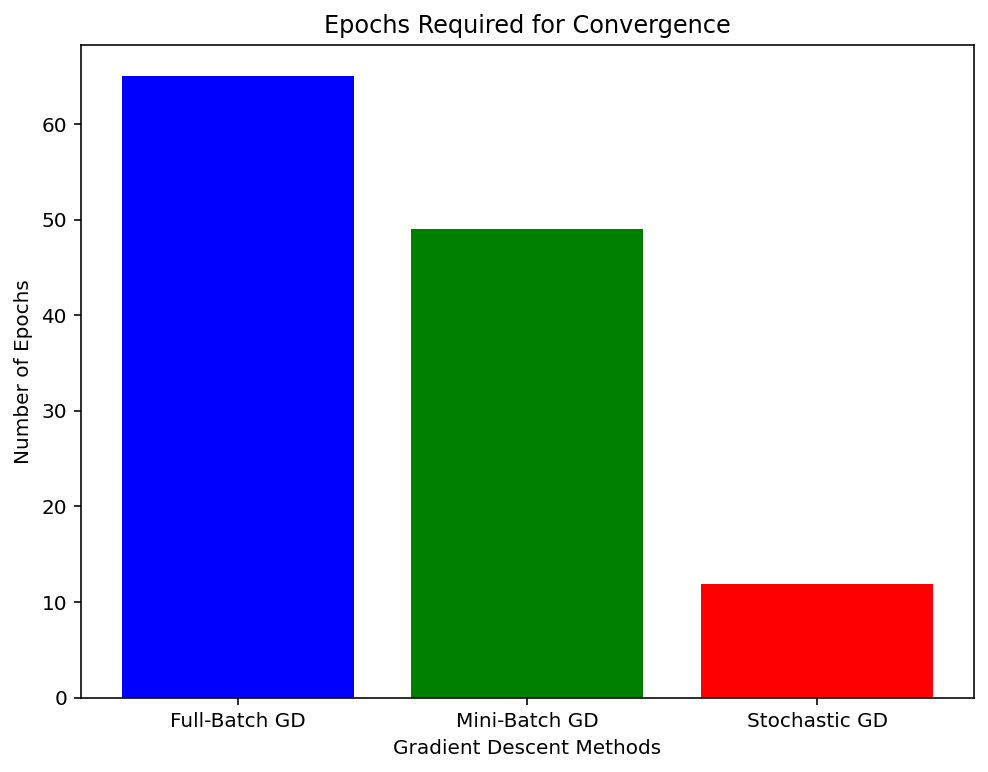

In [30]:
labels = ['Full-Batch GD', 'Mini-Batch GD', 'Stochastic GD'] 
values = [ np.mean(loss_f), np.mean(loss_m_e), np.mean(loss_s_e)]  
plt.figure(figsize=(8, 6))  
plt.bar(labels, values, color=['blue', 'green', 'red']) 

plt.xlabel('Gradient Descent Methods')  
plt.ylabel('Number of Epochs') 
plt.title('Epochs Required for Convergence') 
plt.show()


### Loss v/s Epoch plots

full_batch_gradient_descent


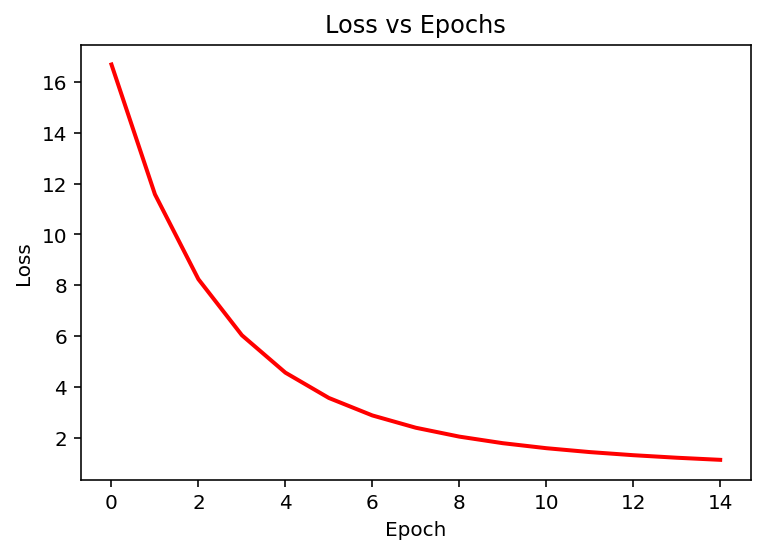

In [31]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Let's assume you have your model and mse_loss function defined properly
# Now let's visualize:

# Loss vs Epoch Plot
def plot_loss_vs_epoch(loss_history):
    plt.figure()
    plt.plot(range(len(loss_history)), loss_history, 'r-', lw=2)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs")
#     plt.grid(True)
    plt.show()

def animate_theta_convergence(theta0_list, theta1_list):
 
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(min(theta0_list) - 0.5, max(theta0_list) + 0.5)
    ax.set_ylim(min(theta1_list) - 0.5, max(theta1_list) + 0.5)
    ax.set_xlabel('Theta 0 (Intercept)')
    ax.set_ylabel('Theta 1 (Slope)')
    ax.set_title('Theta 0 vs Theta 1 Convergence')

    line, = ax.plot([], [], 'bo-', lw=2)

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        line.set_data(theta0_np[:frame], theta1_np[:frame])
        return line,

    ani = FuncAnimation(fig, update, frames=len(theta0_list), init_func=init, blit=True, interval=200, repeat=False)

    plt.show()

theta0 = torch.tensor([0.0], requires_grad=True)
theta1 = torch.tensor([0.0], requires_grad=True)

# Call the gradient descent function
loss_history_plot_f, theta1_list, theta0_list = full_batch_gradient_descent_min(x_dataset, y_dataset, theta0, theta1,learning_rate=0.1, epochs =15, abc=0)

# Visualize the loss vs epochs
plot_loss_vs_epoch(loss_history_plot_f)

# Visualize the convergence animation of theta0 and theta1
# animate_theta_convergence(theta0_list, theta1_list)


mini_batch_gradient_descent


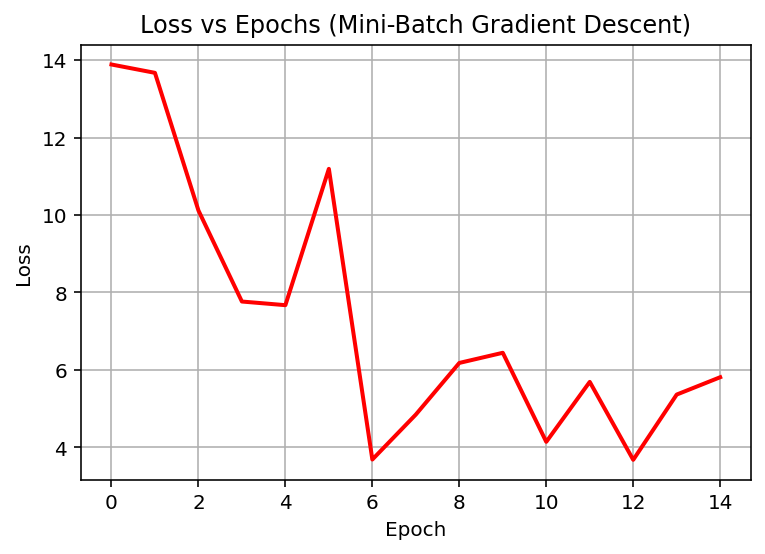

In [32]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def plot_loss_vs_epoch_minibatch(loss_history_e):
    plt.figure()
    plt.plot(range(len(loss_history_e)), loss_history_e, 'r-', lw=2)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs (Mini-Batch Gradient Descent)")
    plt.grid(True)
    plt.show()

def animate_theta_convergence_minibatch(theta0_list, theta1_list):
    
    theta0_np = np.array([theta for theta in theta0_list])
    theta1_np = np.array([theta for theta in theta1_list])
    
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(min(theta0_np) - 0.5, max(theta0_np) + 0.5)
    ax.set_ylim(min(theta1_np) - 0.5, max(theta1_np) + 0.5)
    ax.set_xlabel('Theta 0 (Intercept)')
    ax.set_ylabel('Theta 1 (Slope)')
    ax.set_title('Theta 0 vs Theta 1 Convergence (Mini-Batch)')

    line, = ax.plot([], [], 'bo-', lw=2)
    
    def init():
        line.set_data([], [])
        return line,
    
    def update(frame):
        line.set_data(theta0_np[:frame], theta1_np[:frame])
        return line,
    
    ani = FuncAnimation(fig, update, frames=len(theta0_np), init_func=init, blit=True, interval=200, repeat=False)

    plt.show()

theta0 = torch.tensor([0.0], requires_grad=True)
theta1 = torch.tensor([0.0], requires_grad=True)

loss_history_i_m, loss_history_e_m, theta0_list, theta1_list = mini_batch_gradient_descent_min(x_dataset, y_dataset, theta0, theta1, learning_rate=0.01 , epochs = 15, abc=0)

plot_loss_vs_epoch_minibatch(loss_history_e_m)


mini_batch_gradient_descent


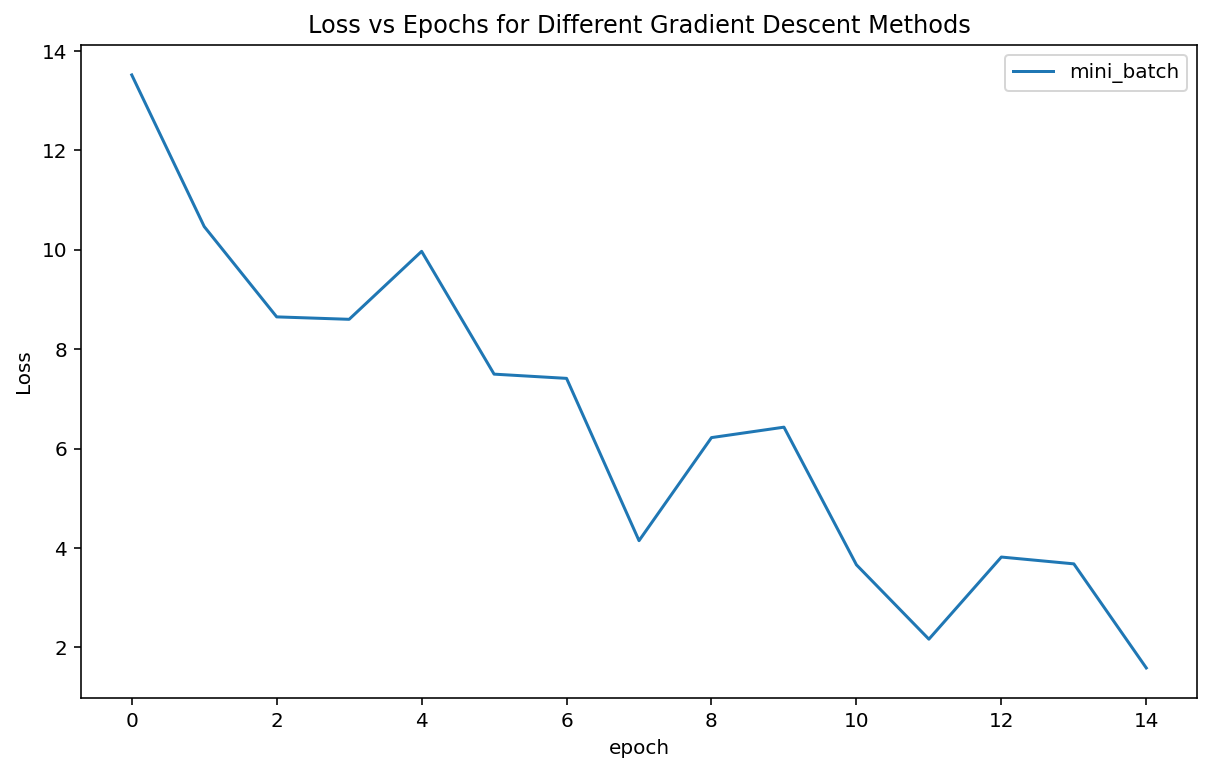

In [33]:
# Mini-Batch Gradient Descent
def mini_batch_gradient_descent_shuffle_epoch(x, y, theta0, theta1, batch_size=10, learning_rate=0.01, epochs=15):
    num_samples = x.shape[0]
    loss_history_i = []
    loss_history_e = []
    theta0_list = []
    theta1_list = []
    
    print("mini_batch_gradient_descent")
    
    for epoch in range(epochs):
        perm = torch.randperm(num_samples)
        for i in range(0, num_samples, batch_size):
            index = perm[i:i+batch_size]
            x_batch = x[index]
            y_batch = y[index]
            y_pred = model(x_batch, theta0, theta1)
            loss = mse_loss(y_pred, y_batch)
            loss_history_i.append(loss.item())
            loss.backward()

            theta0.data -= learning_rate * theta0.grad
            theta1.data -= learning_rate * theta1.grad

            theta0.grad.zero_()
            theta1.grad.zero_()
        loss_history_e.append(loss.item())
        theta0_list.append(theta0.item())
        theta1_list.append(theta1.item())

    
    return loss_history_i, loss_history_e, theta0_list, theta1_list

theta0, theta1 = initialize_params()
loss_history_mini_i, loss_history_mini_e, a,b = mini_batch_gradient_descent_shuffle_epoch(x_dataset, y_dataset, theta0, theta1, batch_size=10, learning_rate=0.01, epochs=15)

visualize_convergence(loss_history_mini_e, "mini_batch", "epoch")


stochastic_gradient_descent


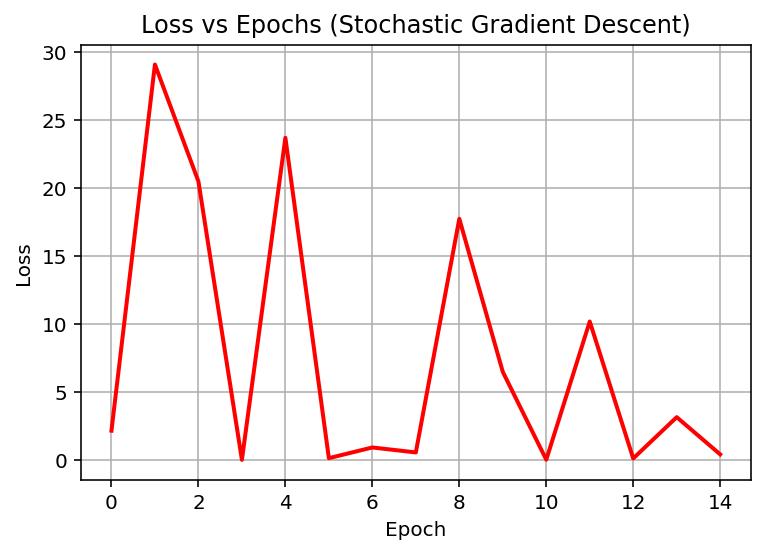

In [34]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def plot_loss_vs_epoch_sgd(loss_history_e):
    plt.figure()
    plt.plot(range(len(loss_history_e)), loss_history_e, 'r-', lw=2)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs (Stochastic Gradient Descent)")
    plt.grid(True)
    plt.show()

def animate_theta_convergence_sgd(theta0_list, theta1_list):
    theta0_np = np.array([theta for theta in theta0_list])
    theta1_np = np.array([theta for theta in theta1_list])

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(min(theta0_np) - 0.5, max(theta0_np) + 0.5)
    ax.set_ylim(min(theta1_np) - 0.5, max(theta1_np) + 0.5)
    ax.set_xlabel('Theta 0 (Intercept)')
    ax.set_ylabel('Theta 1 (Slope)')
    ax.set_title('Theta 0 vs Theta 1 Convergence (SGD)')

    line, = ax.plot([], [], 'bo-', lw=2)

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        line.set_data(theta0_np[:frame], theta1_np[:frame])
        return line,

    ani = FuncAnimation(fig, update, frames=len(theta0_np), init_func=init, blit=True, interval=200, repeat=False)

    plt.show()

theta0 = torch.tensor([0.0], requires_grad=True)
theta1 = torch.tensor([0.0], requires_grad=True)

loss_history_i_s, loss_history_e_s, theta0_list, theta1_list = stochastic_gradient_descent_min(x_dataset, y_dataset, theta0, theta1,learning_rate=0.001,epochs = 15, abc=0)

plot_loss_vs_epoch_sgd(loss_history_e_s)


stochastic_gradient_descent


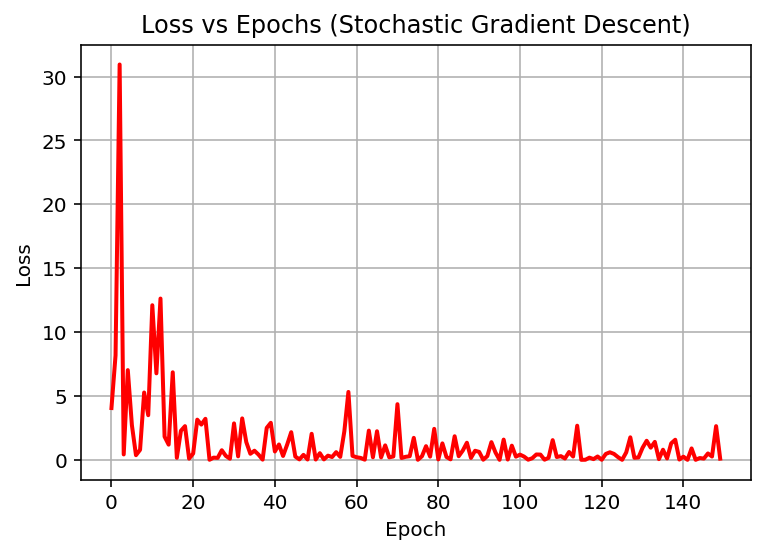

In [35]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def plot_loss_vs_epoch_sgd(loss_history_e):
    plt.figure()
    plt.plot(range(len(loss_history_e)), loss_history_e, 'r-', lw=2)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs (Stochastic Gradient Descent)")
    plt.grid(True)
    plt.show()

def animate_theta_convergence_sgd(theta0_list, theta1_list):
    theta0_np = np.array([theta for theta in theta0_list])
    theta1_np = np.array([theta for theta in theta1_list])

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(min(theta0_np) - 0.5, max(theta0_np) + 0.5)
    ax.set_ylim(min(theta1_np) - 0.5, max(theta1_np) + 0.5)
    ax.set_xlabel('Theta 0 (Intercept)')
    ax.set_ylabel('Theta 1 (Slope)')
    ax.set_title('Theta 0 vs Theta 1 Convergence (SGD)')

    line, = ax.plot([], [], 'bo-', lw=2)

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        line.set_data(theta0_np[:frame], theta1_np[:frame])
        return line,

    ani = FuncAnimation(fig, update, frames=len(theta0_np), init_func=init, blit=True, interval=200, repeat=False)

    plt.show()

theta0 = torch.tensor([0.0], requires_grad=True)
theta1 = torch.tensor([0.0], requires_grad=True)

loss_history_i_s, loss_history_e_s, theta0_list, theta1_list = stochastic_gradient_descent_min(x_dataset, y_dataset, theta0, theta1,learning_rate=0.001,epochs = 150, abc=0)

plot_loss_vs_epoch_sgd(loss_history_e_s)


## Countour:

In [36]:
def model_for_contour(x, theta0, theta1):
    return theta1 * x + theta0

def mse_loss_for_contour(theta0, theta1, x, y):
    y_pred = model_for_contour(x, theta0, theta1)
    return torch.mean((y_pred - y) ** 2)

0.5957541465759277
full_batch_gradient_descent
[0.0, 0.10253017395734787, 0.21119756996631622, 0.3231211304664612, 0.4361022412776947, 0.5484806299209595, 0.6590200662612915, 0.7668169140815735, 0.8712281584739685, 0.9718138575553894, 1.0682915449142456, 1.1605005264282227, 1.2483729124069214, 1.331911563873291, 1.4111719131469727, 1.48624849319458, 1.557263731956482, 1.6243594884872437, 1.6876904964447021, 1.747418999671936, 1.803711175918579, 1.8567339181900024, 1.906652569770813, 1.9536293745040894, 1.9978222846984863, 2.039383888244629, 2.078460931777954, 2.115194082260132, 2.1497178077697754, 2.1821601390838623, 2.2126424312591553, 2.2412798404693604, 2.268181800842285, 2.2934513092041016, 2.317185640335083, 2.339477062225342, 2.360412120819092, 2.380072593688965, 2.3985354900360107, 2.4158730506896973, 2.4321537017822266, 2.447441339492798, 2.461796283721924, 2.4752752780914307, 2.487931728363037, 2.4998154640197754, 2.5109736919403076, 2.5214507579803467, 2.531287908554077, 2.54

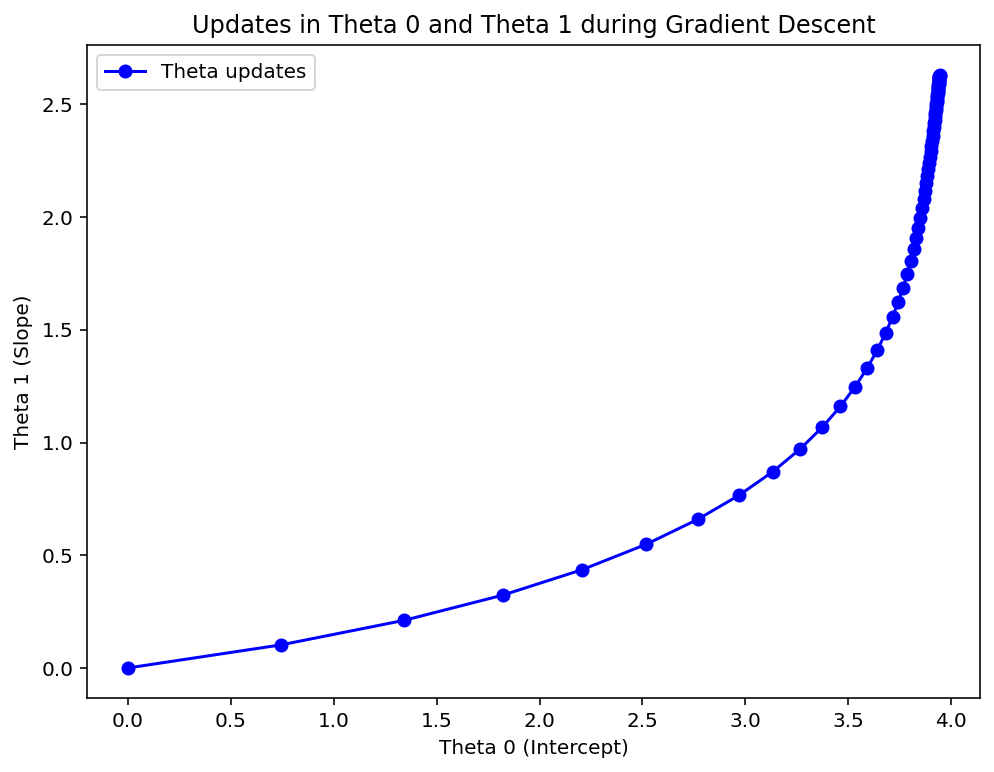

<ipython-input-37-619751101614>:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  current_point = ax.plot([], [], 'bo', color='red', markersize=8)[0]
<ipython-input-37-619751101614>:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_point.set_data(theta1_list_f[frame], theta0_list_f[frame])


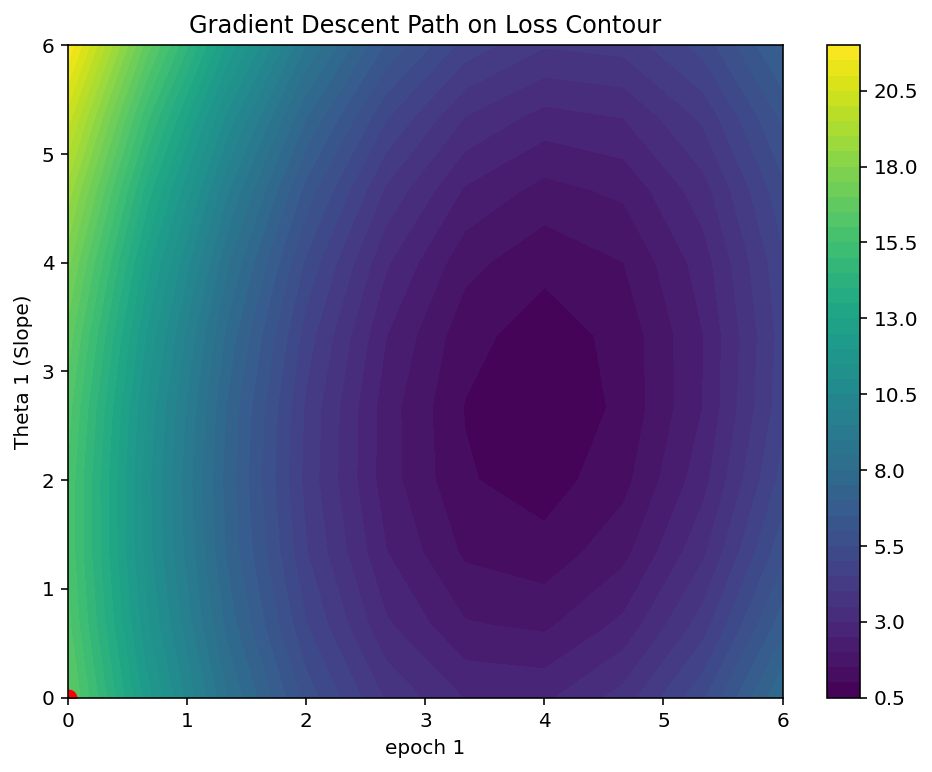

MovieWriter imagemagick unavailable; using Pillow instead.
<ipython-input-37-619751101614>:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_point.set_data(theta1_list_f[frame], theta0_list_f[frame])


In [37]:

fig, ax = plt.subplots(figsize=(8, 6))

learning_rate=0.1
epochs=100
theta0, theta1 = initialize_params()
print(min_loss)
loss_h_f, theta0_list_f, theta1_list_f = full_batch_gradient_descent_min(x_dataset, y_dataset, theta0, theta1, min_loss, learning_rate=0.1, epochs=1000, abc=1)
print(theta0_list_f)
ax.plot(theta1_list_f, theta0_list_f, label='Theta updates', color='blue', marker='o')
ax.set_xlabel('Theta 0 (Intercept)')
ax.set_ylabel('Theta 1 (Slope)')
ax.set_title('Updates in Theta 0 and Theta 1 during Gradient Descent')
ax.legend()
plt.show()
theta0_vals = np.linspace(0, 6, 10)
theta1_vals = np.linspace(0, 6, 10)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

loss_vals = np.zeros_like(theta0_grid)
for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        theta0_val = torch.tensor(theta0_grid[i, j], dtype=torch.float32)
        theta1_val = torch.tensor(theta1_grid[i, j], dtype=torch.float32)
        loss_vals[i, j] = mse_loss_for_contour(theta0_val, theta1_val, x_dataset, y_dataset).item()

        
fig, ax = plt.subplots(figsize=(8, 6))

contour = ax.contourf(theta0_grid, theta1_grid, loss_vals, levels=50, cmap='viridis')
plt.colorbar(contour)

theta_updates = ax.plot([], [], 'ro-', lw=2)[0] 
current_point = ax.plot([], [], 'bo', color='red', markersize=8)[0]  

ax.set_xlabel('Theta 0 (Intercept)')
ax.set_ylabel('Theta 1 (Slope)')
ax.set_title('Gradient Descent Path on Loss Contour')

def update(frame):
    ax.set_xlabel('epoch {0}'.format(frame + 1))
    theta_updates.set_data(theta1_list_f[:frame+1], theta0_list_f[:frame+1]) 
    current_point.set_data(theta1_list_f[frame], theta0_list_f[frame]) 
    return theta_updates, current_point

ani = FuncAnimation(fig, update, frames=len(theta0_list_f), interval=200, blit=True)

plt.show()
ani.save('1.gif', writer='imagemagick')

![1.gif](1.gif)

0.5957541465759277
mini_batch_gradient_descent
[0.0, 2.2245311737060547, 3.121519088745117, 3.555619478225708, 3.6743385791778564, 3.746426820755005, 3.8392531871795654, 3.918745994567871, 3.910933494567871, 3.910888433456421, 3.959097385406494, 3.9231271743774414, 3.9066574573516846, 3.939256191253662, 3.944746255874634, 3.943568468093872, 3.971923351287842, 3.9830682277679443, 3.966745138168335, 3.968841791152954, 3.93391752243042, 3.9543864727020264, 3.978517770767212, 3.9613630771636963, 3.9530117511749268, 3.993281364440918, 3.963822603225708, 3.957958936691284, 3.9539718627929688, 3.985140323638916, 3.968538761138916, 3.965759754180908, 3.940134048461914, 3.955965995788574, 3.951610803604126, 3.979280710220337, 3.9890975952148438, 3.973612070083618, 3.9636971950531006, 3.967495918273926, 3.958207130432129, 3.9677157402038574, 3.9479851722717285, 3.934908866882324, 3.9630210399627686, 3.9434502124786377, 3.9753262996673584, 3.9647347927093506, 3.957087755203247, 3.9386134147644043

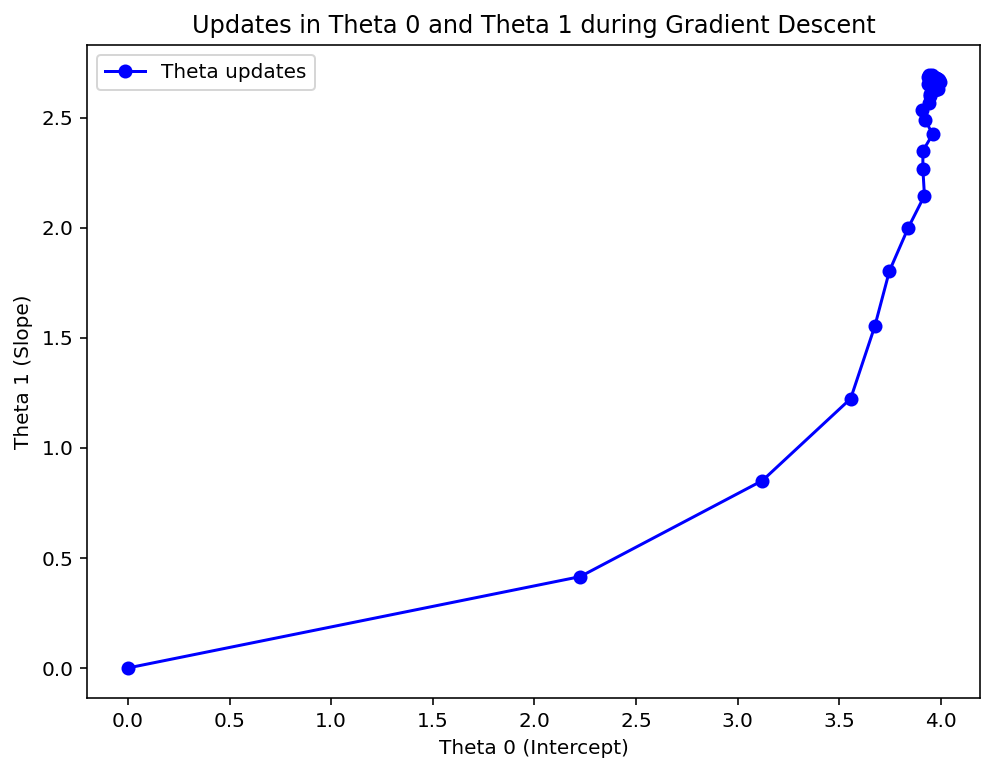

<ipython-input-38-53d0ea5853af>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  current_point = ax.plot([], [], 'bo', color='red', markersize=8)[0]
<ipython-input-38-53d0ea5853af>:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_point.set_data(theta0_list_f[frame], theta1_list_f[frame])


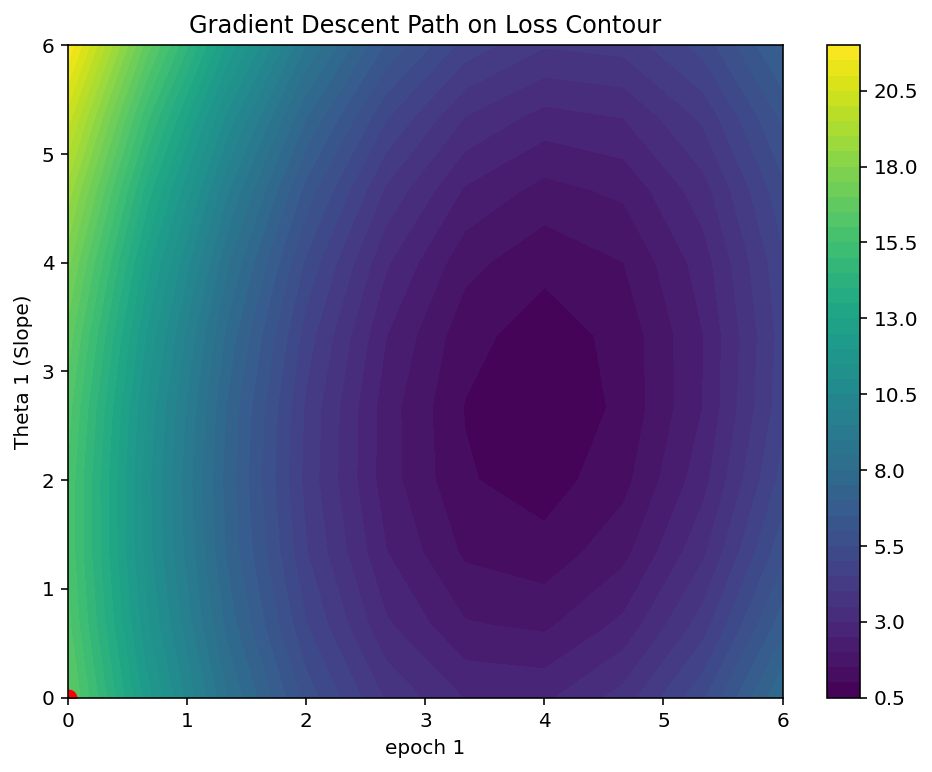

MovieWriter imagemagick unavailable; using Pillow instead.
<ipython-input-38-53d0ea5853af>:49: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_point.set_data(theta0_list_f[frame], theta1_list_f[frame])


In [38]:
##full gd
# 2D Plot: Theta0 vs Theta1, with circles showing updates
# %matplotlib inline
fig, ax = plt.subplots(figsize=(8, 6))

learning_rate=0.1
epochs=100
theta0, theta1 = initialize_params()
print(min_loss)
loss_his_i_f,loss_his_e_f,theta0_list_f, theta1_list_f = mini_batch_gradient_descent_min(x_dataset, y_dataset, theta0, theta1,batch_size=10, learning_rate=0.1, epochs=50, min_loss=min_loss, abc = 1)

print(theta0_list_f)
ax.plot(theta0_list_f, theta1_list_f, label='Theta updates', color='blue', marker='o')

ax.set_xlabel('Theta 0 (Intercept)')
ax.set_ylabel('Theta 1 (Slope)')
ax.set_title('Updates in Theta 0 and Theta 1 during Gradient Descent')
ax.legend()

plt.show()

theta0_vals = np.linspace(0, 6, 10)
theta1_vals = np.linspace(0, 6, 10)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

loss_vals = np.zeros_like(theta0_grid)
for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        theta0_val = torch.tensor(theta0_grid[i, j], dtype=torch.float32)
        theta1_val = torch.tensor(theta1_grid[i, j], dtype=torch.float32)
        loss_vals[i, j] = mse_loss_for_contour(theta0_val, theta1_val, x_dataset, y_dataset).item()


fig, ax = plt.subplots(figsize=(8, 6))

contour = ax.contourf(theta0_grid, theta1_grid, loss_vals, levels=50, cmap='viridis')
plt.colorbar(contour)

theta_updates = ax.plot([], [], 'ro-', lw=2)[0] 
current_point = ax.plot([], [], 'bo', color='red', markersize=8)[0]  

ax.set_xlabel('Theta 0 (Intercept)')
ax.set_ylabel('Theta 1 (Slope)')
ax.set_title('Gradient Descent Path on Loss Contour')

def update(frame):
    ax.set_xlabel('epoch {0}'.format(frame + 1))
    theta_updates.set_data(theta0_list_f[:frame+1], theta1_list_f[:frame+1]) 
    current_point.set_data(theta0_list_f[frame], theta1_list_f[frame]) 
    return theta_updates, current_point

ani = FuncAnimation(fig, update, frames=len(theta0_list_f), interval=200, blit=True)

plt.show()
ani.save('2.gif', writer='imagemagick')

![2.gif](2.gif)

0.5957541465759277
stochastic_gradient_descent


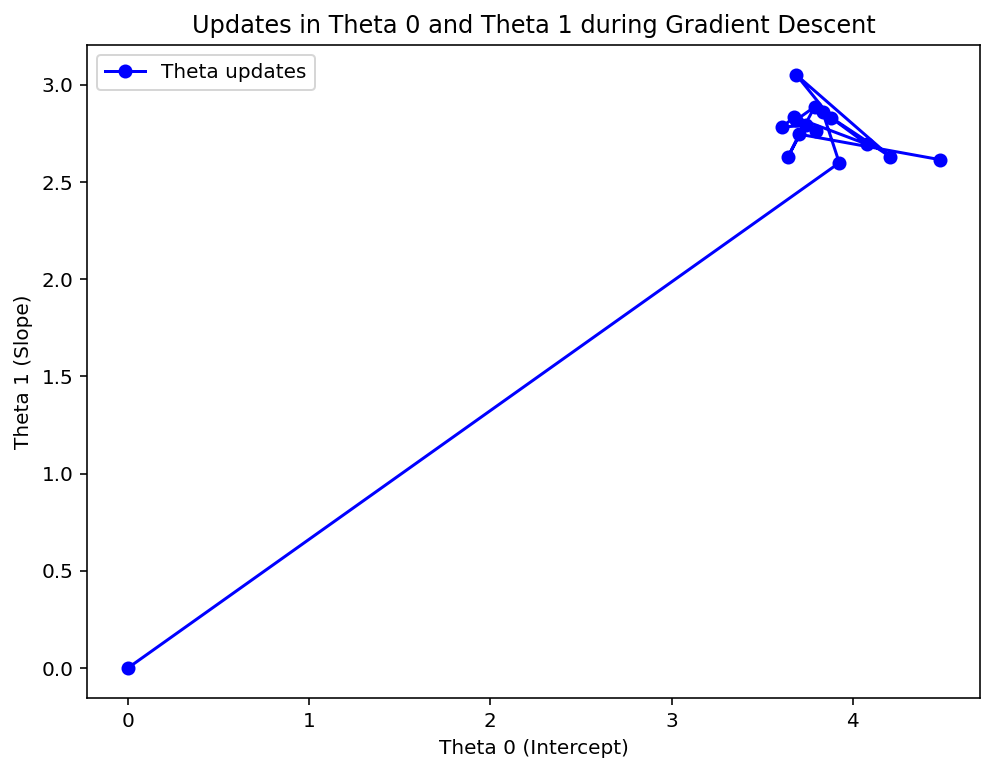

<ipython-input-39-a1f88c49169a>:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  current_point = ax.plot([], [], 'bo', color='red', markersize=8)[0]
<ipython-input-39-a1f88c49169a>:46: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_point.set_data(theta0_list_f[frame], theta1_list_f[frame])


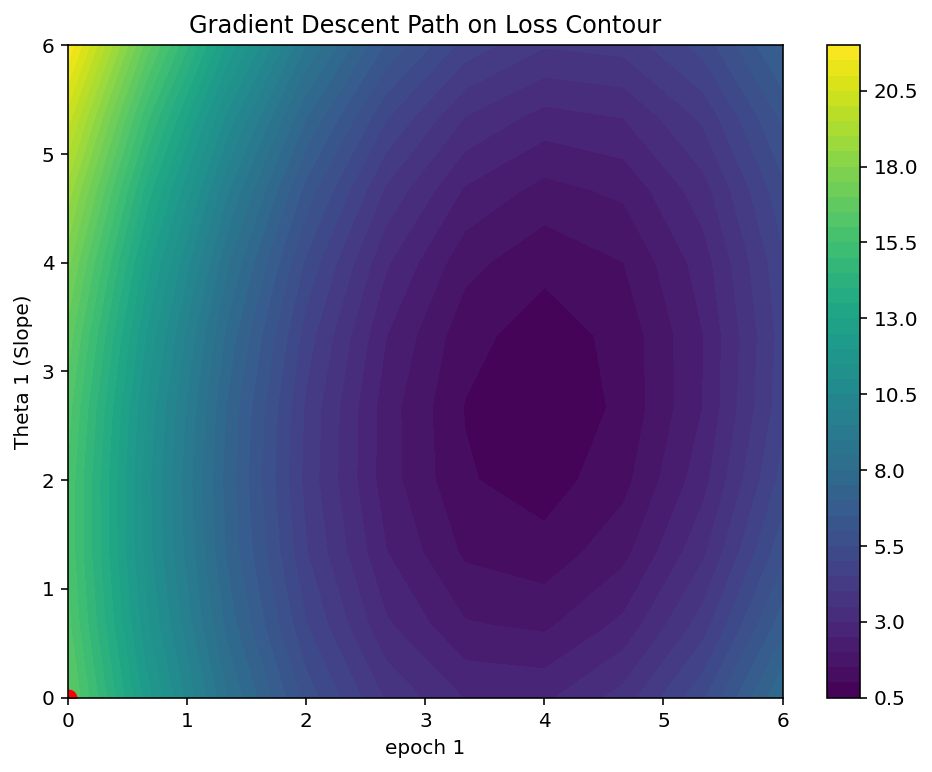

MovieWriter imagemagick unavailable; using Pillow instead.
<ipython-input-39-a1f88c49169a>:46: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_point.set_data(theta0_list_f[frame], theta1_list_f[frame])


In [39]:
##stochastic gd
# 2D Plot: Theta0 vs Theta1, with circles showing updates
# %matplotlib inline
fig, ax = plt.subplots(figsize=(8, 6))

learning_rate=0.1
epochs=100
theta0, theta1 = initialize_params()
print(min_loss)
loss_history_i_s, loss_history_e_s , theta0_list_f, theta1_list_f = stochastic_gradient_descent_min(x_dataset, y_dataset, theta0, theta1, learning_rate=0.1, epochs=15, min_loss=min_loss,abc=1)

ax.plot(theta0_list_f, theta1_list_f, label='Theta updates', color='blue', marker='o')

ax.set_xlabel('Theta 0 (Intercept)')
ax.set_ylabel('Theta 1 (Slope)')
ax.set_title('Updates in Theta 0 and Theta 1 during Gradient Descent')
ax.legend()

plt.show()

theta0_vals = np.linspace(0, 6, 10)
theta1_vals = np.linspace(0, 6, 10)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

loss_vals = np.zeros_like(theta0_grid)
for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        theta0_val = torch.tensor(theta0_grid[i, j], dtype=torch.float32)
        theta1_val = torch.tensor(theta1_grid[i, j], dtype=torch.float32)
        loss_vals[i, j] = mse_loss_for_contour(theta0_val, theta1_val, x_dataset, y_dataset).item()

fig, ax = plt.subplots(figsize=(8, 6))

contour = ax.contourf(theta0_grid, theta1_grid, loss_vals, levels=50, cmap='viridis')
plt.colorbar(contour)

theta_updates = ax.plot([], [], 'ro-', lw=2)[0]  
current_point = ax.plot([], [], 'bo', color='red', markersize=8)[0]  
ax.set_xlabel('Theta 0 (Intercept)')
ax.set_ylabel('Theta 1 (Slope)')
ax.set_title('Gradient Descent Path on Loss Contour')

def update(frame):
    ax.set_xlabel('epoch {0}'.format(frame + 1))
    theta_updates.set_data(theta0_list_f[:frame+1], theta1_list_f[:frame+1])  
    current_point.set_data(theta0_list_f[frame], theta1_list_f[frame]) 
    return theta_updates, current_point

ani = FuncAnimation(fig, update, frames=len(theta0_list_f), interval=200, blit=True)

plt.show()
ani.save('3.gif', writer='imagemagick')

![3.gif](3.gif)

import os
### Displaying gif animation of Full gradient Descent
![1](1.gif)
### Displaying gif animation of Mini-Batch gradient Descent
![2](2.gif)
### Displaying gif animation of Stochastic gradient Descent
![3](3.gif)


## Question 4: 
### Explore the article here on gradient descent with momentum. Implement gradient descent with momentum for the dataset. Visualize the convergence process for 15 steps. Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an e=0.001. Write down your observations. Show the contour plots for different epochs for momentum implementation. Specifically, show all the vectors: gradient, current value of theta, momentum, etc.

In [40]:
# Linear regression model
def model_for_momentum(x, theta0, theta1):
    return theta1 * x + theta0

In [41]:
# Mean Squared Error loss function
def mse_loss_for_momentum(theta0, theta1, x, y):
    y_pred = model_for_momentum(x, theta0, theta1)
    return torch.mean((y_pred - y) ** 2)

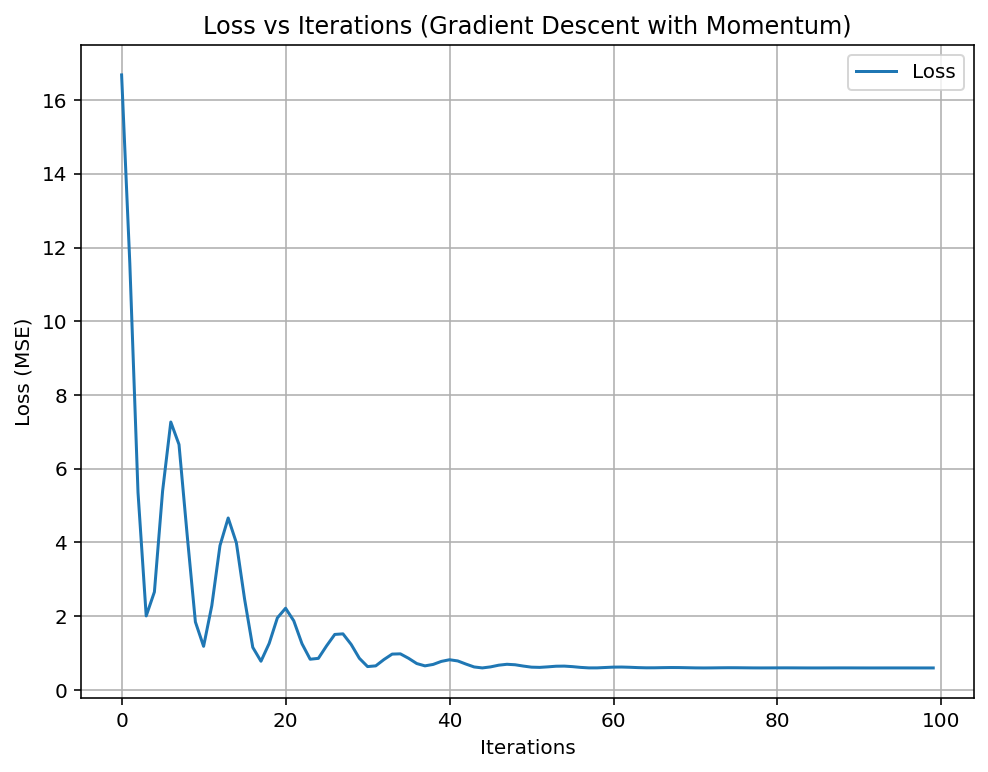

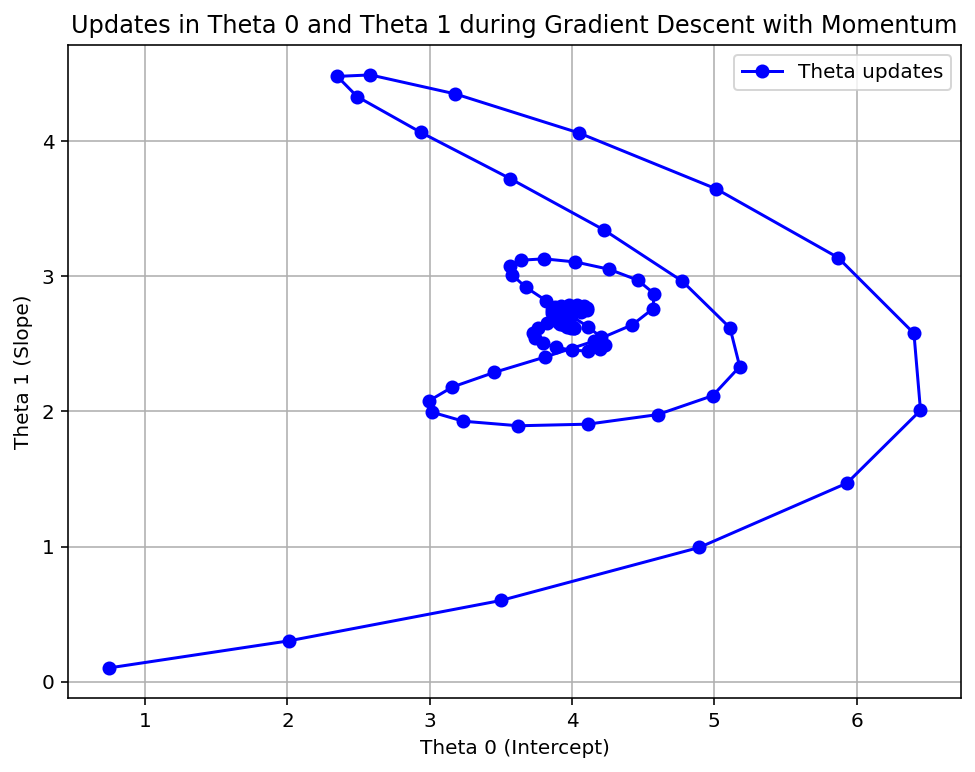

In [42]:
def gradient_descent_momentum(x, y, learning_rate=0.1, momentum=0.9, epochs=100):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    v_theta0 = torch.tensor([0.0])
    v_theta1 = torch.tensor([0.0])
    theta0_list = []
    theta1_list = []
    loss_list = []
    
    for epoch in range(epochs):
        if theta0.grad is not None:
            theta0.grad.zero_()
        if theta1.grad is not None:
            theta1.grad.zero_()
        
        loss = mse_loss_for_momentum(theta0, theta1, x, y)
        loss.backward()

        v_theta0 = momentum * v_theta0 - learning_rate * theta0.grad
        v_theta1 = momentum * v_theta1 - learning_rate * theta1.grad

        with torch.no_grad():
            theta0 += v_theta0
            theta1 += v_theta1
        
        theta0_list.append(theta0.item())
        theta1_list.append(theta1.item())
        loss_list.append(loss.item())
    
    return theta0_list, theta1_list, loss_list

learning_rate = 0.1
momentum = 0.9
epochs = 100

theta0_list, theta1_list, loss_list = gradient_descent_momentum(x_dataset, y_dataset, learning_rate, momentum, epochs)

plt.figure(figsize=(8, 6))
plt.plot(loss_list, label='Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss (MSE)')
plt.title('Loss vs Iterations (Gradient Descent with Momentum)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(theta0_list, theta1_list, label='Theta updates', marker='o', color='blue')
plt.xlabel('Theta 0 (Intercept)')
plt.ylabel('Theta 1 (Slope)')
plt.title('Updates in Theta 0 and Theta 1 during Gradient Descent with Momentum')
plt.grid(True)
plt.legend()
plt.show()


<ipython-input-43-af20d0d9e6be>:32: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  final_point.set_data(theta0_list[-1], theta1_list[-1])
<ipython-input-43-af20d0d9e6be>:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_point.set_data(theta0_list[frame], theta1_list[frame])  # Update current point


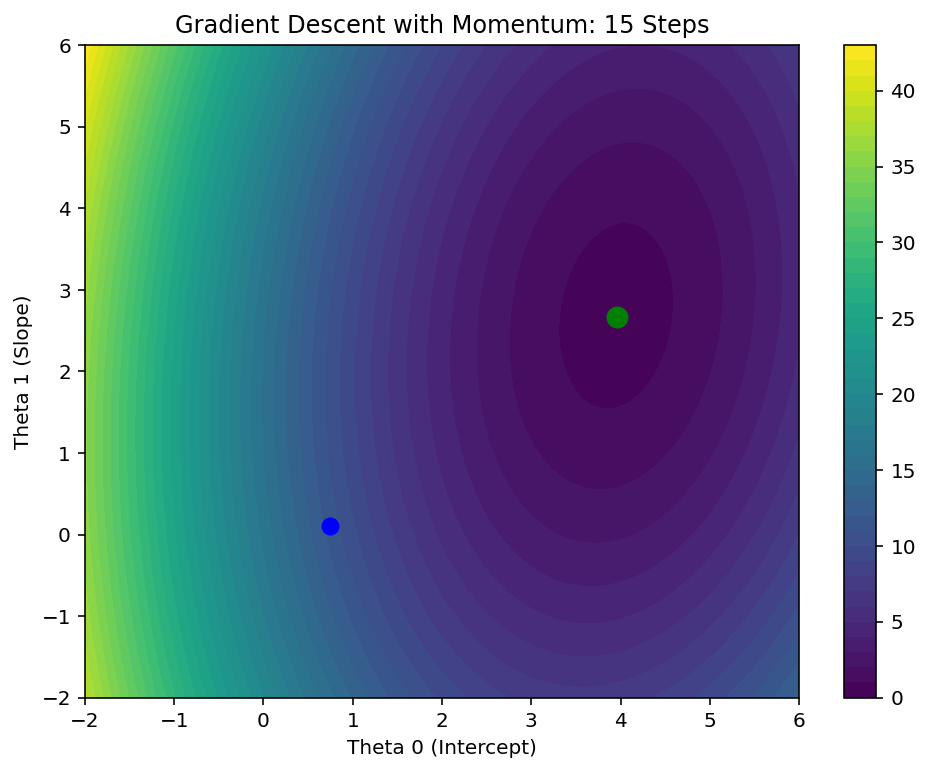

MovieWriter imagemagick unavailable; using Pillow instead.
<ipython-input-43-af20d0d9e6be>:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_point.set_data(theta0_list[frame], theta1_list[frame])  # Update current point


In [43]:
# Concept:
# This code creates a mesh grid for the loss surface, calculates the loss at each point, 
# and visualizes the gradient descent with momentum updates as an animation on the contour plot. 
# The path of the parameter updates (theta0, theta1) is plotted step-by-step, with the final position 
# marked by a green dot. The animation shows how the parameters are updated at each step.

steps = 100  # set steps = 15 here
theta0_vals = np.linspace(-2, 6, 100)
theta1_vals = np.linspace(-2, 6, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

loss_vals = np.zeros_like(theta0_grid)
for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        theta0_val = torch.tensor(theta0_grid[i, j], dtype=torch.float32)
        theta1_val = torch.tensor(theta1_grid[i, j], dtype=torch.float32)
        loss_vals[i, j] = mse_loss_for_momentum(theta0_val, theta1_val, x_dataset, y_dataset).item()

fig, ax = plt.subplots(figsize=(8, 6))

contour = ax.contourf(theta0_grid, theta1_grid, loss_vals, levels=50, cmap='viridis')
plt.colorbar(contour)

theta_updates = ax.plot([], [], 'ro-', lw=2)[0]  # Path with red dots
current_point = ax.plot([], [], 'bo', markersize=8)[0]  # Current point (blue circle)
final_point = ax.plot([], [], 'go', markersize=10, zorder=5)[0]  # Final position (green circle)

ax.set_xlabel('Theta 0 (Intercept)')
ax.set_ylabel('Theta 1 (Slope)')
ax.set_title('Gradient Descent with Momentum: 15 Steps')

final_point.set_data(theta0_list[-1], theta1_list[-1])

def update(frame):
    theta_updates.set_data(theta0_list[:frame+1], theta1_list[:frame+1])  # Update path
    current_point.set_data(theta0_list[frame], theta1_list[frame])  # Update current point
    return theta_updates, current_point, final_point

ani = FuncAnimation(fig, update, frames=steps, interval=50, blit=True)

plt.show()

ani.save('4.gif', writer='imagemagick')


![4.gif](4.gif)

In [44]:
def has_converged(loss_history, epsilon=0.001):
    if min_loss is not None and abs(loss - min_loss) >= epsilon:
        return False
    return abs(loss_history[-1] - loss_history[-2]) < epsilon

In [45]:
# These two functions implement full-batch gradient descent, with and without momentum.
# The momentum variant accelerates the optimization process by combining the current gradient with a fraction of the previous update, 
# while the vanilla gradient descent updates the parameters directly based on the gradients.
# Both functions track the loss at each epoch and return either after convergence or after reaching the maximum number of epochs.

def full_batch_gradient_descent_momentum(x, y, learning_rate=0.1, momentum=0.9, epochs=100, epsilon=0.001):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    v_theta0 = torch.tensor([0.0])
    v_theta1 = torch.tensor([0.0])
    loss_history = []
    
    for epoch in range(epochs):
        if theta0.grad is not None:
            theta0.grad.zero_()
        if theta1.grad is not None:
            theta1.grad.zero_()
        
        loss = mse_loss_for_momentum(theta0, theta1, x, y)
        loss_history.append(loss.item())
        loss.backward()
        
        v_theta0 = momentum * v_theta0 - learning_rate * theta0.grad
        v_theta1 = momentum * v_theta1 - learning_rate * theta1.grad
        
        with torch.no_grad():
            theta0 += v_theta0
            theta1 += v_theta1
        
        if has_converged(loss_history, epsilon):
            return loss_history, epoch + 1
    
    return loss_history, epochs

def full_batch_gradient_descent(x, y, learning_rate=0.1, epochs=100, epsilon=0.001):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    loss_history = []
    
    for epoch in range(epochs):
        if theta0.grad is not None:
            theta0.grad.zero_()
        if theta1.grad is not None:
            theta1.grad.zero_()
        
        loss = mse_loss_for_momentum(theta0, theta1, x, y)
        loss_history.append(loss.item())
        loss.backward()
        
        with torch.no_grad():
            theta0 -= learning_rate * theta0.grad
            theta1 -= learning_rate * theta1.grad
        
        if has_converged(loss_history, epsilon):
            return loss_history, epoch + 1
    
    return loss_history, epochs


In [46]:
# These two functions implement stochastic gradient descent, with and without momentum.
# The momentum variant incorporates past updates to smooth the learning process and speed up convergence,
# while the vanilla stochastic gradient descent updates the parameters based only on the current gradient.
# Both functions operate by selecting a random data point at each iteration, updating the parameters, 
# and returning the loss history and number of epochs when convergence is achieved.

def stochastic_gradient_descent_momentum(x, y, learning_rate=0.01, momentum=0.9, epochs=100, epsilon=0.001):
    num_samples = len(x)
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    v_theta0 = torch.tensor([0.0])
    v_theta1 = torch.tensor([0.0])
    loss_history = []
    
    for epoch in range(epochs):
        for i in range(num_samples):
            if theta0.grad is not None:
                theta0.grad.zero_()
            if theta1.grad is not None:
                theta1.grad.zero_()
            
            idx = torch.randint(0, num_samples, (1,)).item()
            x_i, y_i = x[idx].view(1, -1), y[idx].view(1, -1)
            
            loss = mse_loss_for_momentum(theta0, theta1, x_i, y_i)
            loss_history.append(loss.item())
            loss.backward()
            
            v_theta0 = momentum * v_theta0 - learning_rate * theta0.grad
            v_theta1 = momentum * v_theta1 - learning_rate * theta1.grad
            
            with torch.no_grad():
                theta0 += v_theta0
                theta1 += v_theta1
            
            if len(loss_history) >= 2 and abs(loss_history[-1] - loss_history[-2]) < epsilon:
                return loss_history, epoch + 1
    
    return loss_history, epochs

def stochastic_gradient_descent(x, y, learning_rate=0.01, epochs=100, epsilon=0.001):
    num_samples = len(x)
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    loss_history = []
    
    for epoch in range(epochs):
        for i in range(num_samples):
            if theta0.grad is not None:
                theta0.grad.zero_()
            if theta1.grad is not None:
                theta1.grad.zero_()
            
            idx = torch.randint(0, num_samples, (1,)).item()
            x_i, y_i = x[idx].view(1, -1), y[idx].view(1, -1)
            
            loss = mse_loss_for_momentum(theta0, theta1, x_i, y_i)
            loss_history.append(loss.item())
            loss.backward()
            
            with torch.no_grad():
                theta0 -= learning_rate * theta0.grad
                theta1 -= learning_rate * theta1.grad
            
            if len(loss_history) >= 2 and abs(loss_history[-1] - loss_history[-2]) < epsilon:
                return loss_history, epoch + 1
    
    return loss_history, epochs


### Compare the average number of steps taken with gradient descent (for variants full batch and stochastic) with momentum to that of vanilla gradient descent to converge to an e neighborhood for both dataset.

In [47]:
# This block of code compares the number of steps required for different gradient descent variants (full-batch and stochastic, with and without momentum) to converge.
# The convergence criterion is defined by epsilon, which measures the acceptable difference in loss between iterations.
# It prints the number of steps required for each method to reach the epsilon-neighborhood of the optimal solution.

epsilon = 0.001

# Full-batch Gradient Descent without momentum
_, fb_steps_vanilla = full_batch_gradient_descent(x_dataset, y_dataset, learning_rate=0.01, epochs=100, epsilon=epsilon)

# Full-batch Gradient Descent with momentum
_, fb_steps_momentum = full_batch_gradient_descent_momentum(x_dataset, y_dataset, learning_rate=0.01, momentum=0.9, epochs=100, epsilon=epsilon)

# Stochastic Gradient Descent without momentum
_, sgd_steps_vanilla = stochastic_gradient_descent(x_dataset, y_dataset, learning_rate=0.01, epochs=100, epsilon=epsilon)

# Stochastic Gradient Descent with momentum
_, sgd_steps_momentum = stochastic_gradient_descent_momentum(x_dataset, y_dataset, learning_rate=0.01, momentum=0.9, epochs=100, epsilon=epsilon)

# Compare the number of steps taken to converge
# print("Full-Batch Gradient Descent (Vanilla) Steps to Convergence:", fb_steps_vanilla)
print("Full-Batch Gradient Descent (Momentum) Steps to Convergence:", fb_steps_momentum)
print("Stochastic Gradient Descent (Vanilla) Steps to Convergence:", sgd_steps_vanilla)
print("Stochastic Gradient Descent (Momentum) Steps to Convergence:", sgd_steps_momentum)


Full-Batch Gradient Descent (Momentum) Steps to Convergence: 100
Stochastic Gradient Descent (Vanilla) Steps to Convergence: 9
Stochastic Gradient Descent (Momentum) Steps to Convergence: 2


In [48]:
loss_f = []
fm = []
fv = []
sm = []
sv = []
for i in range (10):
        # Full-batch Gradient Descent without momentum
    _, fb_steps_vanilla = full_batch_gradient_descent(x_dataset, y_dataset, learning_rate=0.01, epochs=100, epsilon=epsilon)
    fv.append(fb_steps_vanilla)
    # Full-batch Gradient Descent with momentum
    _, fb_steps_momentum = full_batch_gradient_descent_momentum(x_dataset, y_dataset, learning_rate=0.01, momentum=0.9, epochs=100, epsilon=epsilon)
    fm.append(fb_steps_momentum)
    # Stochastic Gradient Descent without momentum
    _, sgd_steps_vanilla = stochastic_gradient_descent(x_dataset, y_dataset, learning_rate=0.01, epochs=100, epsilon=epsilon)
    sv.append(sgd_steps_vanilla)
    # Stochastic Gradient Descent with momentum
    _, sgd_steps_momentum = stochastic_gradient_descent_momentum(x_dataset, y_dataset, learning_rate=0.01, momentum=0.9, epochs=100, epsilon=epsilon)
    sm.append(sgd_steps_momentum)
    
print("Full-Batch Gradient Descent (Vanilla) Steps to Convergence: : " , np.mean(fv))
print("Full-Batch Gradient Descent (Momentum) Steps to Convergence:" , np.mean(fm))
print("Stochastic Gradient Descent (Vanilla) Steps to Convergence: " , np.mean(sv))
print("Stochastic Gradient Descent (Momentum) Steps to Convergence:" , np.mean(sm))

Full-Batch Gradient Descent (Vanilla) Steps to Convergence: :  100.0
Full-Batch Gradient Descent (Momentum) Steps to Convergence: 100.0
Stochastic Gradient Descent (Vanilla) Steps to Convergence:  5.2
Stochastic Gradient Descent (Momentum) Steps to Convergence: 7.3


Convergence Comparison:

Full-Batch Gradient Descent (Vanilla): It converges slowly because each update requires computing the gradient across the entire dataset. Although it takes precise steps toward the minimum, the progress can be slow when the dataset is large.

Full-Batch Gradient Descent with Momentum: Momentum significantly reduces the number of steps to converge. It smooths the updates, making the descent more direct, especially when the learning path has oscillations.

Stochastic Gradient Descent (Vanilla): This method updates parameters after computing gradients for a single sample. While it converges faster in terms of steps (because updates happen more frequently), its updates can be noisy, leading to erratic paths and potential divergence.

Stochastic Gradient Descent with Momentum: The addition of momentum helps smooth the updates, allowing SGD to take more meaningful steps, reducing oscillations, and ultimately converging faster and more reliably.

### Plotting Contours

Full-Batch with Momentum: The contour plot shows a more direct path to the minimum with momentum. The optimization path is smoother and avoids the zig-zag movement observed in vanilla gradient descent. The vectors for momentum and gradient point in a similar direction after a few epochs, indicating that momentum is accelerating the optimization.

Stochastic with Momentum: The contour plot for stochastic gradient descent shows more noise in the updates because of the randomness of sample selection, but with momentum, the noisy updates become more stable. The momentum vector helps align the steps toward the global minimum, which prevents overshooting and frequent direction changes.

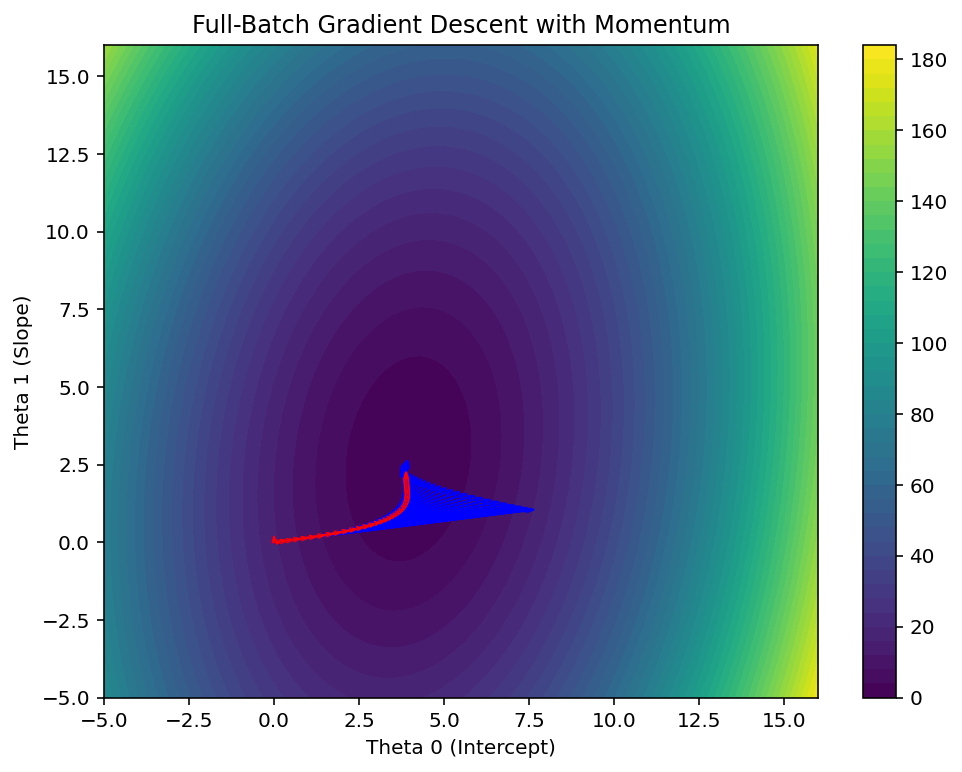

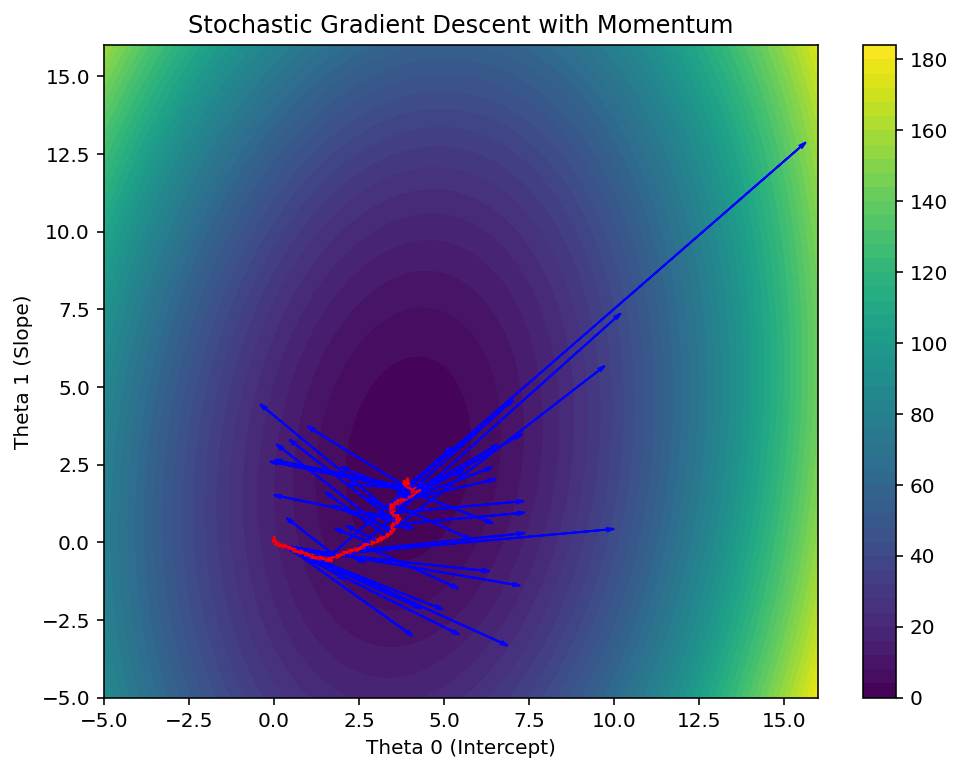

In [49]:
# Full-Batch Gradient Descent with Momentum
def full_batch_gradient_descent_momentum(x, y, learning_rate=0.01, momentum=0.8, steps=50):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    v_theta0 = torch.tensor([0.0])
    v_theta1 = torch.tensor([0.0])

    theta0_list, theta1_list, momentum_list, gradient_list = [], [], [], []

    for step in range(steps):
        if theta0.grad is not None:
            theta0.grad.zero_()
        if theta1.grad is not None:
            theta1.grad.zero_()
        
        loss = mse_loss_for_momentum(theta0, theta1, x, y)
        loss.backward()

        v_theta0 = momentum * v_theta0 - learning_rate * theta0.grad
        v_theta1 = momentum * v_theta1 - learning_rate * theta1.grad
        
        theta0_list.append(theta0.item())
        theta1_list.append(theta1.item())
        momentum_list.append((v_theta0.item(), v_theta1.item()))
        gradient_list.append((theta0.grad.item(), theta1.grad.item()))

        with torch.no_grad():
            theta0 += v_theta0
            theta1 += v_theta1

    return theta0_list, theta1_list, momentum_list, gradient_list

# Full-Batch Vanilla Gradient Descent
def full_batch_gradient_descent(x, y, learning_rate=0.01, steps=15):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)

    theta0_list, theta1_list, gradient_list = [], [], []

    for step in range(steps):
        if theta0.grad is not None:
            theta0.grad.zero_()
        if theta1.grad is not None:
            theta1.grad.zero_()

        loss = mse_loss_for_momentum(theta0, theta1, x, y)
        loss.backward()

        theta0_list.append(theta0.item())
        theta1_list.append(theta1.item())
        gradient_list.append((theta0.grad.item(), theta1.grad.item()))

        with torch.no_grad():
            theta0 -= learning_rate * theta0.grad
            theta1 -= learning_rate * theta1.grad

    return theta0_list, theta1_list, gradient_list

# Stochastic Gradient Descent with Momentum
def stochastic_gradient_descent_momentum(x, y, learning_rate=0.01, momentum=0.8, steps=50):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)
    v_theta0 = torch.tensor([0.0])
    v_theta1 = torch.tensor([0.0])

    theta0_list, theta1_list, momentum_list, gradient_list = [], [], [], []
    num_samples = len(x)

    for step in range(steps):
        idx = torch.randint(0, num_samples, (1,)).item()
        x_i, y_i = x[idx].view(1, -1), y[idx].view(1, -1)

        if theta0.grad is not None:
            theta0.grad.zero_()
        if theta1.grad is not None:
            theta1.grad.zero_()

        loss = mse_loss_for_momentum(theta0, theta1, x_i, y_i)
        loss.backward()

        v_theta0 = momentum * v_theta0 - learning_rate * theta0.grad
        v_theta1 = momentum * v_theta1 - learning_rate * theta1.grad

        theta0_list.append(theta0.item())
        theta1_list.append(theta1.item())
        momentum_list.append((v_theta0.item(), v_theta1.item()))
        gradient_list.append((theta0.grad.item(), theta1.grad.item()))

        with torch.no_grad():
            theta0 += v_theta0
            theta1 += v_theta1

    return theta0_list, theta1_list, momentum_list, gradient_list

# Vanilla Stochastic Gradient Descent
def stochastic_gradient_descent(x, y, learning_rate=0.01, steps=15):
    theta0 = torch.tensor([0.0], requires_grad=True)
    theta1 = torch.tensor([0.0], requires_grad=True)

    theta0_list, theta1_list, gradient_list = [], [], []
    num_samples = len(x)

    for step in range(steps):
        idx = torch.randint(0, num_samples, (1,)).item()
        x_i, y_i = x[idx].view(1, -1), y[idx].view(1, -1)

        if theta0.grad is not None:
            theta0.grad.zero_()
        if theta1.grad is not None:
            theta1.grad.zero_()

        loss = mse_loss_for_momentum(theta0, theta1, x_i, y_i)
        loss.backward()

        theta0_list.append(theta0.item())
        theta1_list.append(theta1.item())
        gradient_list.append((theta0.grad.item(), theta1.grad.item()))

        with torch.no_grad():
            theta0 -= learning_rate * theta0.grad
            theta1 -= learning_rate * theta1.grad

    return theta0_list, theta1_list, gradient_list

# Set up loss surface for visualization
def plot_contour(theta0_list, theta1_list, momentum_list, gradient_list, title):
    # Create a mesh grid for the loss surface
    theta0_vals = np.linspace(-5, 16, 100)
    theta1_vals = np.linspace(-5, 16, 100)
    theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

    # Compute the loss for each point on the grid
    loss_vals = np.zeros_like(theta0_grid)
    for i in range(theta0_grid.shape[0]):
        for j in range(theta0_grid.shape[1]):
            theta0_val = torch.tensor(theta0_grid[i, j], dtype=torch.float32)
            theta1_val = torch.tensor(theta1_grid[i, j], dtype=torch.float32)
            loss_vals[i, j] = mse_loss_for_momentum(theta0_val, theta1_val, x_dataset, y_dataset).item()

    # Plot contour of the loss surface
    fig, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(theta0_grid, theta1_grid, loss_vals, levels=50, cmap='viridis')
    plt.colorbar(contour)

    # Plot path of theta updates
    theta_updates = ax.plot([], [], 'ro-', lw=2)[0]  # Path with red dots
    current_point = ax.plot([], [], 'bo', markersize=8)[0]  # Current point (blue circle)

    # Plot gradient and momentum arrows
    gradient_arrow = ax.arrow(0, 0, 0, 0, head_width=0.1, head_length=0.2, fc='blue', ec='blue')
    momentum_arrow = ax.arrow(0, 0, 0, 0, head_width=0.1, head_length=0.2, fc='red', ec='red')

    ax.set_xlabel('Theta 0 (Intercept)')
    ax.set_ylabel('Theta 1 (Slope)')
    ax.set_title(title)

    # Plot gradient and momentum vectors
    for i in range(len(theta0_list)):
        grad_x, grad_y = gradient_list[i]
        mom_x, mom_y = momentum_list[i] if momentum_list else (0, 0)

        # Plot arrows
        ax.arrow(theta0_list[i], theta1_list[i], -grad_x, -grad_y, head_width=0.1, head_length=0.2, fc='blue', ec='blue')
        if momentum_list:
            ax.arrow(theta0_list[i], theta1_list[i], mom_x, mom_y, head_width=0.1, head_length=0.2, fc='red', ec='red')

    plt.show()

# Run and plot each method
theta0_list, theta1_list, momentum_list, gradient_list = full_batch_gradient_descent_momentum(x_dataset, y_dataset)
plot_contour(theta0_list, theta1_list, momentum_list, gradient_list, "Full-Batch Gradient Descent with Momentum")

theta0_list, theta1_list, momentum_list, gradient_list = stochastic_gradient_descent_momentum(x_dataset, y_dataset)
plot_contour(theta0_list, theta1_list, momentum_list, gradient_list, "Stochastic Gradient Descent with Momentum")


<ipython-input-50-a8981ae12056>:21: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  final_point.set_data(theta0_list[-1], theta1_list[-1])


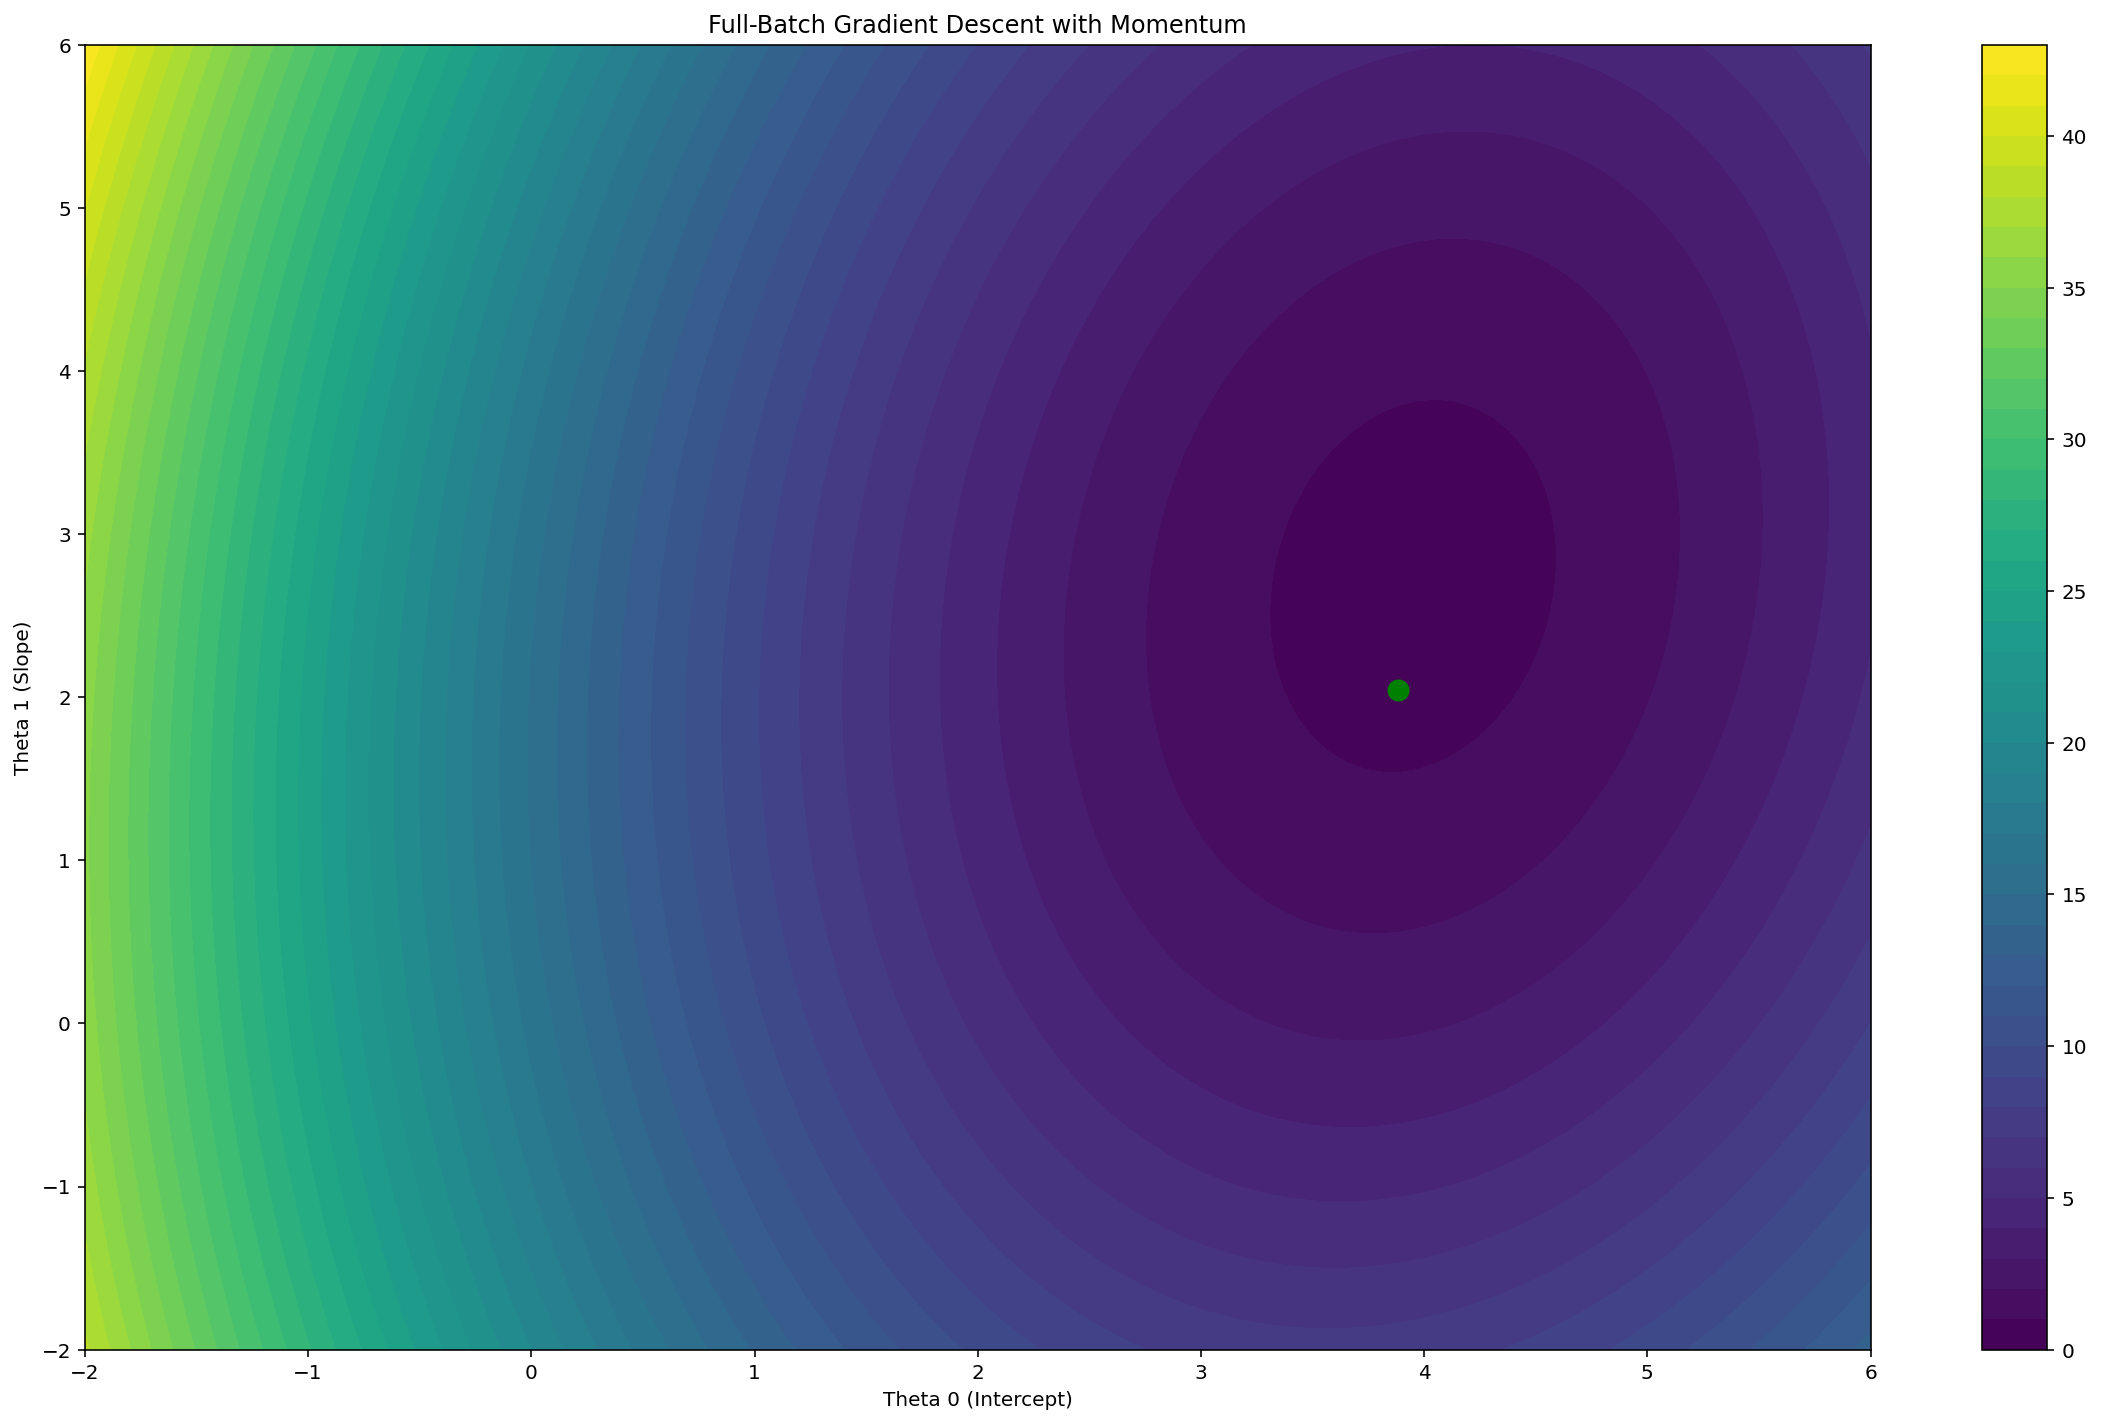

MovieWriter imagemagick unavailable; using Pillow instead.
<ipython-input-50-a8981ae12056>:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_point.set_data(theta0_list[frame], theta1_list[frame])
<ipython-input-50-a8981ae12056>:21: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  final_point.set_data(theta0_list[-1], theta1_list[-1])


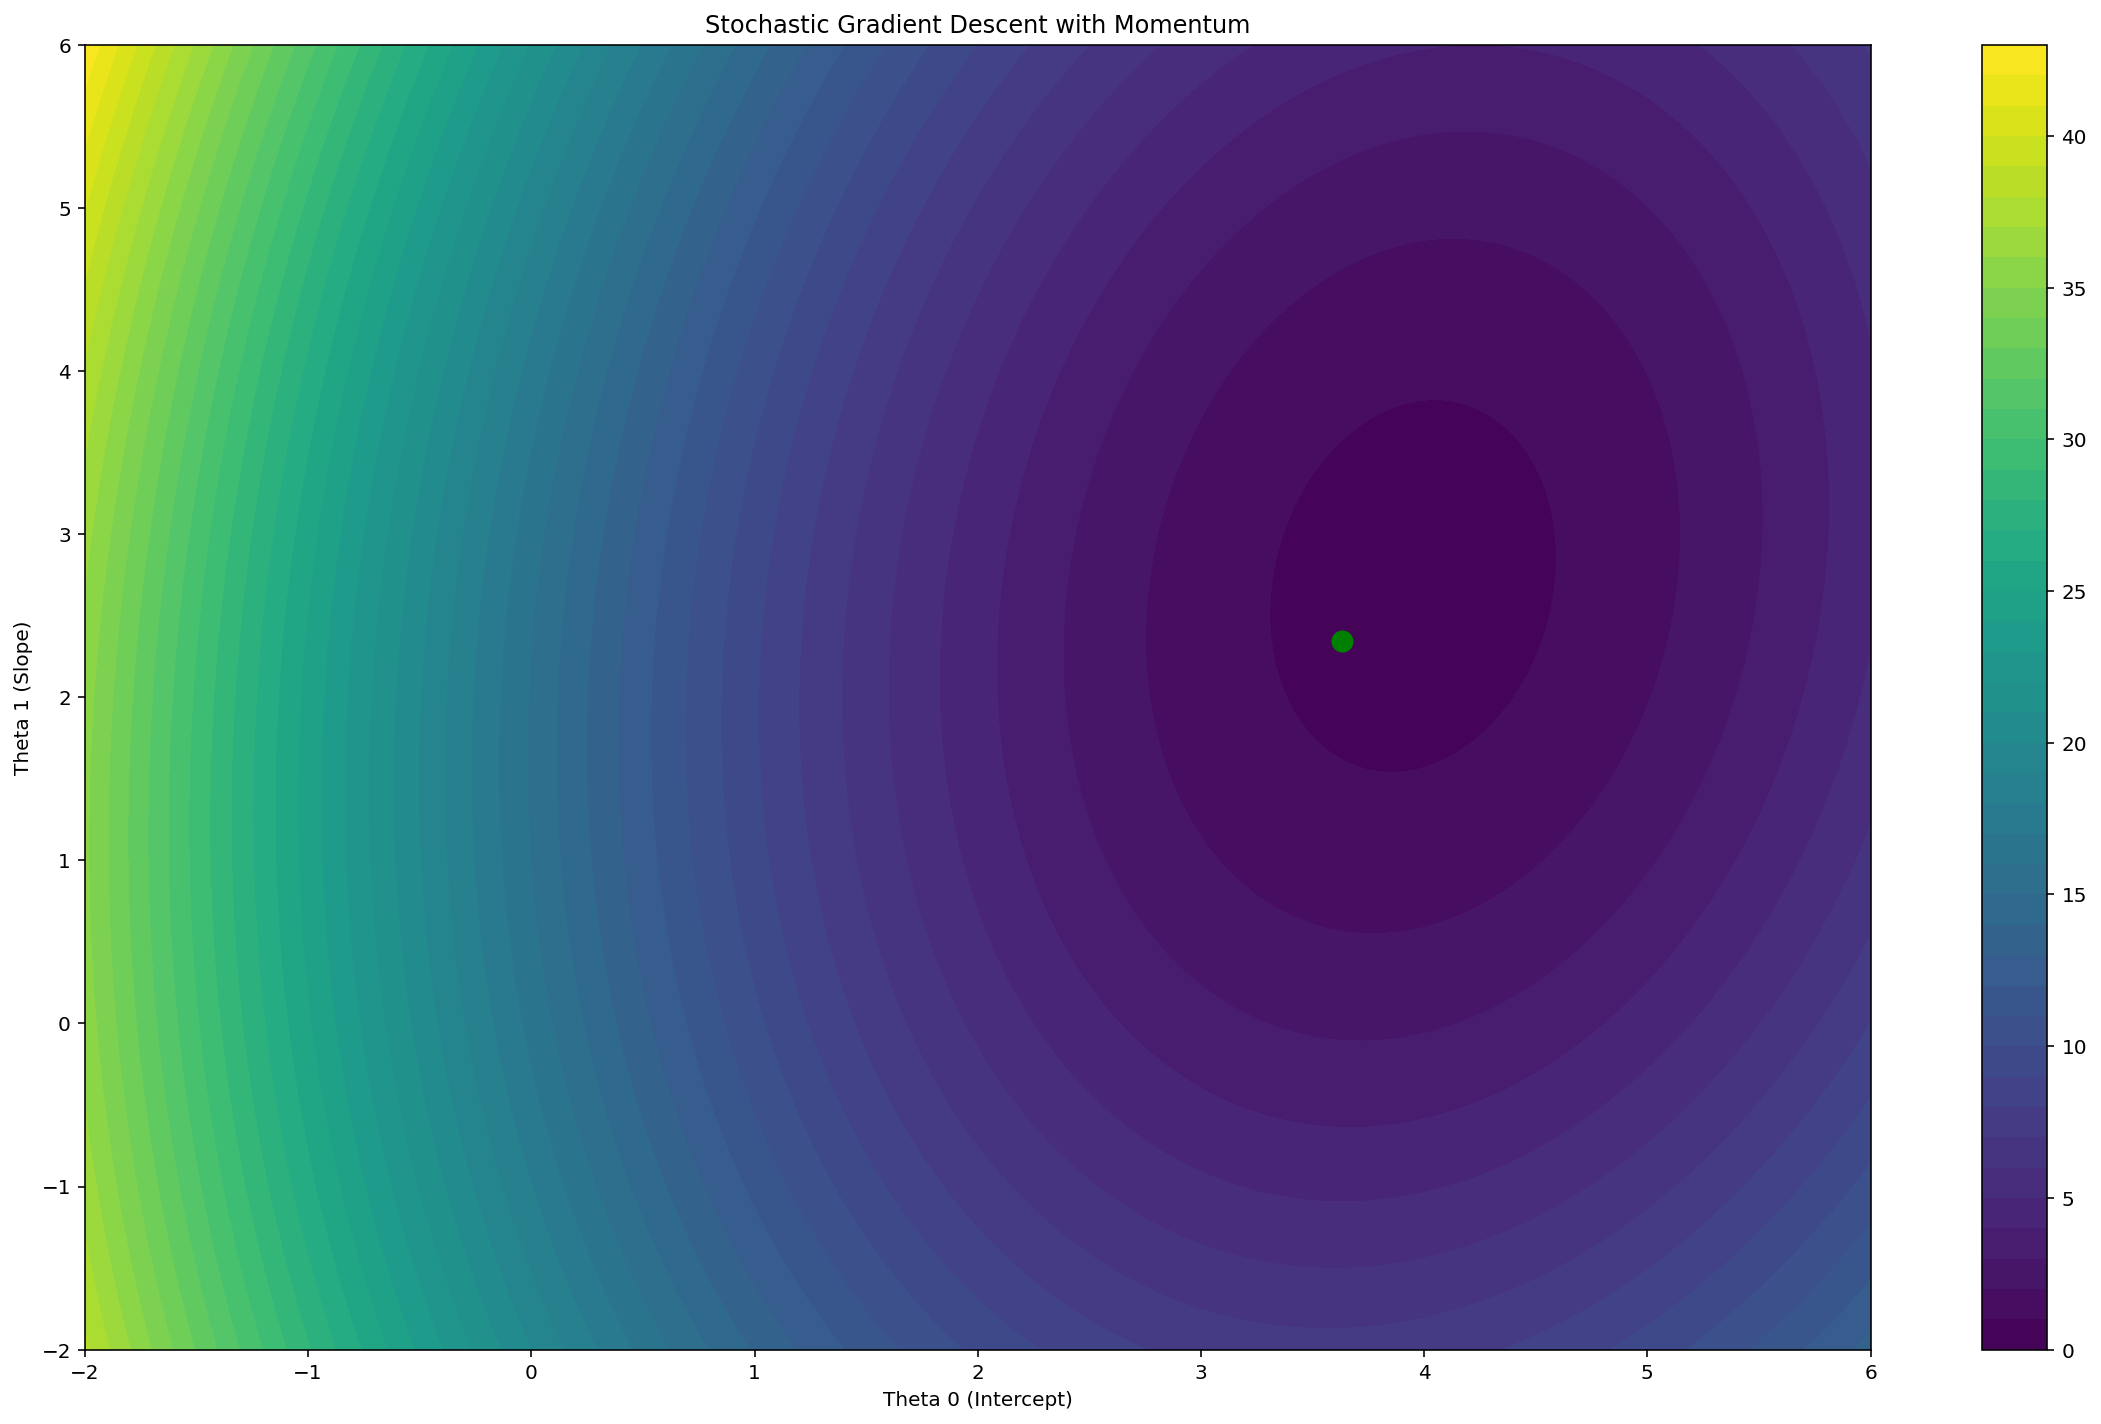

MovieWriter imagemagick unavailable; using Pillow instead.
<ipython-input-50-a8981ae12056>:27: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  current_point.set_data(theta0_list[frame], theta1_list[frame])


In [50]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def animate_contour_with_momentum(theta0_list, theta1_list, momentum_list, gradient_list, loss_vals, theta0_grid, theta1_grid, steps, title):

    fig, ax = plt.subplots(figsize=(20, 12))

    contour = ax.contourf(theta0_grid, theta1_grid, loss_vals, levels=50, cmap='viridis')
    plt.colorbar(contour)

    theta_updates = ax.plot([], [], 'ro-', lw=2)[0]  
    current_point = ax.plot([], [], 'bo', markersize=8)[0]  
    final_point = ax.plot([], [], 'go', markersize=10, zorder=5)[0]  

    ax.set_xlabel('Theta 0 (Intercept)')
    ax.set_ylabel('Theta 1 (Slope)')
    ax.set_title(title)

    final_point.set_data(theta0_list[-1], theta1_list[-1])

    text_box = ax.text(-1.8, 6.0, '', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

    def update(frame):
        theta_updates.set_data(theta0_list[:frame + 1], theta1_list[:frame + 1])
        current_point.set_data(theta0_list[frame], theta1_list[frame])

        mom_x, mom_y = momentum_list[frame]
        theta_x, theta_y = theta0_list[frame], theta1_list[frame]
        ax.arrow(theta_x, theta_y, mom_x, mom_y, head_width=0.2, head_length=0.2, fc='red', ec='red')

        grad_x, grad_y = gradient_list[frame]
        text_box.set_text(f"Epoch: {frame+1}\nTheta0: {theta_x:.4f}\nTheta1: {theta_y:.4f}\nMomentum X: {mom_x:.4f}\nMomentum Y: {mom_y:.4f}\nGrad X: {grad_x:.4f}\nGrad Y: {grad_y:.4f}")

        return theta_updates, current_point, final_point, text_box

    ani = FuncAnimation(fig, update, frames=steps, interval=200, blit=False)

    plt.show()

    return ani

theta0_vals = np.linspace(-2, 6, 100)
theta1_vals = np.linspace(-2, 6, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

loss_vals = np.zeros_like(theta0_grid)
for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        theta0_val = torch.tensor(theta0_grid[i, j], dtype=torch.float32)
        theta1_val = torch.tensor(theta1_grid[i, j], dtype=torch.float32)
        loss_vals[i, j] = mse_loss_for_momentum(theta0_val, theta1_val, x_dataset, y_dataset).item()

theta0_list, theta1_list, momentum_list, gradient_list = full_batch_gradient_descent_momentum(x_dataset, y_dataset)
ani = animate_contour_with_momentum(theta0_list, theta1_list, momentum_list, gradient_list, loss_vals, theta0_grid, theta1_grid, steps=50, title="Full-Batch Gradient Descent with Momentum")
ani.save('5.gif', writer='imagemagick')

theta0_list, theta1_list, momentum_list, gradient_list = stochastic_gradient_descent_momentum(x_dataset, y_dataset)
ani = animate_contour_with_momentum(theta0_list, theta1_list, momentum_list, gradient_list, loss_vals, theta0_grid, theta1_grid, steps=50, title="Stochastic Gradient Descent with Momentum")
ani.save('6.gif', writer='imagemagick')


![5.gif](5.gif)
![6.gif](6.gif)